<h1 style="text-align:center;color:blue;font-size:50px;font-family:ALGERIAN;border:solid">Projet de Machine Learning</h1>

<h1 style="text-align:center;color:blue;font-size:50px;font-family:times">Ecole Nationale de la Statistique et de l'Analyse Economique Pierre NDIAYE (ENSAE)</h1><br>

<div style="display:flex;text-align:justify">
    
    
<ul style="text-align:justify;font-family:times;font-size:15px;list-style-type:circle; width:60%"> 
<span style="font-weight:bold">Réalisé par : </span> 
    <ul style="text-align:justify;font-family:times;font-size:15px;list-style-type:circle">
        <li>Nicolas LOUGUE</li> 
        <li>Komla Alex LABOU</li>                                      
        <li>Mawuéna Elisée AMEWOUAME</li>                                  
    </ul>
    <span style="font-style: italic;font-size:13px">Élèves Ingénieurs Statisticiens Economistes</span>
</ul>
 
<ul style="text-align:justify;font-family:times;font-size:15px;list-style-type:none;width:39%"> 
 <li style="font-weight:bold">Sous la supervision de :</li> 
 <li>Mme. Mously DIAW</li>                                     
   
</ul>
    
</div>   

![image.png](https://t4.ftcdn.net/jpg/07/22/75/73/240_F_722757381_fJE309694Pfdcch4iolXiEDnBWrWebFY.jpg)

<h2 style="text-align:justify;color:blue;font-size:30px;font-family:ALGERIAN">I. PRELIMINAIRE</h2>

<h3 style="text-align:justify;color:black;font-size:26px;font-family:Georgia"> A. Définition de l'environnement de travail</h3>

In [1]:
from pathlib import Path

# définir le répertoire du projet contenant le dossier data/ et notebooks/
HOME = Path.cwd().parent
print(f"Home directory: {HOME}")

# définir le répertoire des données
DATA = Path(HOME, "data")
print(f"Data directory: {DATA}")

Home directory: C:\Users\DELL\Desktop\Projet ML2
Data directory: C:\Users\DELL\Desktop\Projet ML2\data


In [11]:
!pip install geopandas

  Using cached geopandas-0.14.4-py3-none-any.whl (1.1 MB)
     --------------------------------------- 22.9/22.9 MB 49.6 kB/s eta 0:00:00
     ---------------------------------------- 6.1/6.1 MB 124.2 kB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 117.7 kB/s eta 0:00:00
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)
  Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
! pip install flake8


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



     --------------------------------------- 57.6/57.6 kB 57.2 kB/s eta 0:00:00
     -------------------------------------- 62.7/62.7 kB 140.0 kB/s eta 0:00:00
  Attempting uninstall: pycodestyle
    Found existing installation: pycodestyle 2.8.0
    Uninstalling pycodestyle-2.8.0:
      Successfully uninstalled pycodestyle-2.8.0


<h3 style="text-align:justify;color:black;font-size:26px;font-family:Georgia">B. Importation des packages</h3>

In [14]:
%pylab inline
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.dates as mdates
import geopandas
import warnings
warnings.filterwarnings('ignore')
import flake8

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


<h2 style="text-align:justify;color:blue;font-size:30px;font-family:ALGERIAN">II. PREPOCESSING</h2>

<h3 style="text-align:justify;color:black;font-size:26px;font-family:Georgia">A. Informations sur la base de données</h3>

<p style="font-family:times;font-size:15px">
    Dans le cadre de ce travail, nous allons travailler sur des données qui sont réparties en plusieurs bases de données. Nous allons donc les importer elles toutes et les fusionner l'une avec l'autre selon un sens de manière à avoir la base la plus complète possible ayant un sens. Nous avons en tout 9 bases de données renseignant sur entre autres les produits, les informations relatives à une commande, aux payements de la commande et aux retours par rapport à la commande. </p>

In [68]:
customers = pd.read_csv(Path(DATA, "olist_customers_dataset.csv"), sep=",")
order_payments = pd.read_csv(Path(DATA, "olist_order_payments_dataset.csv"), sep=",")
geolocation = pd.read_csv(Path(DATA, "olist_geolocation_dataset.csv"), sep=",")
order_items = pd.read_csv(Path(DATA, "olist_order_items_dataset.csv"), sep=",")
products = pd.read_csv(Path(DATA, "olist_products_dataset.csv"), sep=",")
orders = pd.read_csv(Path(DATA, "olist_orders_dataset.csv"), sep=",")
order_reviews = pd.read_csv(Path(DATA, "olist_order_reviews_dataset.csv"), sep=",")
sellers = pd.read_csv(Path(DATA, "olist_sellers_dataset.csv"), sep=",")
product_translation = pd.read_csv(Path(DATA, "product_category_name_translation.csv"), sep=",")

In [69]:
# Afficher la taille de chaque DataFrame
print("customers:", customers.shape)
print("order_payments:", order_payments.shape)
print("geolocation:", geolocation.shape)
print("order_items:", order_items.shape)
print("products:", products.shape)
print("orders:", orders.shape)
print("order_reviews:", order_reviews.shape)
print("sellers:", sellers.shape)
print("product_translation:", product_translation.shape)

customers: (99441, 5)
order_payments: (103886, 5)
geolocation: (1000163, 5)
order_items: (112650, 7)
products: (32951, 9)
orders: (99441, 8)
order_reviews: (99224, 7)
sellers: (3095, 4)
product_translation: (71, 2)


<p style="font-family:times;font-size:15px">
Nous allons parcourir chaque base autant qu possible avant de voir comment les merger </p>

In [70]:
liste = [customers, order_payments, geolocation, order_items, products, orders, order_reviews, sellers, product_translation]
for table in liste:
    for col in table.columns:
        # dates as DateTime
        if any([sub in col for sub in ['date', '_at', 'timestamp']]):
            table[col] = table[col].astype('datetime64[ns]')
        # zipcodes as string
        if any([sub in col for sub in ['zip_code']]):
            table[col] = table[col].astype(str)
        # lower strings
        if table[col].dtype == 'object':
            table[col] = table[col].str.lower()

<h4 style="text-align:justify;color:red;font-size:20px;font-family:Georgia">1. Base Produit</h4>

In [71]:
products[products['product_category_name'].isnull()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [72]:
products[products['product_width_cm'].isnull()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<p style="font-family:times;font-size:15px">
On voit ainsi que pour plusieurs produits, on a aucune information sur leur noms, leur tailles, bref leur caractéristique. Nous allons alors pour ces produits remplacer par 0 leurs caractéristiques de taille et remplacer par <b>unknwon</b> (Inconnu) leurs noms. </p>

In [73]:
# products table null values
products['product_category_name'] = products['product_category_name'].fillna('unknown')
products['product_name_lenght'] = products['product_name_lenght'].fillna(0)
products['product_description_lenght'] = products['product_description_lenght'].fillna(0)
products['product_photos_qty'] = products['product_photos_qty'].fillna(0)

<p style="font-family:times;font-size:15px">
Nous avons aussi par ailleurs, plusieurs types de produits. En vue de limiter les modalités, nous allons regrouper les produits en catégories</p>

In [74]:
print(product_translation['product_category_name_english'].nunique())
product_translation['product_category_name_english'].unique()

71


array(['health_beauty', 'computers_accessories', 'auto', 'bed_bath_table',
       'furniture_decor', 'sports_leisure', 'perfumery', 'housewares',
       'telephony', 'watches_gifts', 'food_drink', 'baby', 'stationery',
       'tablets_printing_image', 'toys', 'fixed_telephony',
       'garden_tools', 'fashion_bags_accessories', 'small_appliances',
       'consoles_games', 'audio', 'fashion_shoes', 'cool_stuff',
       'luggage_accessories', 'air_conditioning',
       'construction_tools_construction',
       'kitchen_dining_laundry_garden_furniture',
       'costruction_tools_garden', 'fashion_male_clothing', 'pet_shop',
       'office_furniture', 'market_place', 'electronics',
       'home_appliances', 'party_supplies', 'home_confort',
       'costruction_tools_tools', 'agro_industry_and_commerce',
       'furniture_mattress_and_upholstery', 'books_technical',
       'home_construction', 'musical_instruments',
       'furniture_living_room', 'construction_tools_lights',
       'indust

In [75]:
categ_agg = {
    # food_drinks
    'food_drink': 'food_drinks',
    'food': 'food_drinks',
    'drinks': 'food_drinks',

    # home
    'furniture_living_room': 'home',
    'furniture_mattress_and_upholstery': 'home',
    'furniture_bedroom': 'home',
    'furniture_decor': 'home',
    'bed_bath_table': 'home',
    'kitchen_dining_laundry_garden_furniture': 'home',
    'la_cuisine': 'home',
    'home_confort': 'home',
    'home_comfort_2': 'home',
    'christmas_supplies': 'home',
    'housewares': 'home',

    # appliances
    'small_appliances': 'appliances',
    'small_appliances_home_oven_and_coffee': 'appliances',
    'home_appliances_2': 'appliances',
    'home_appliances': 'appliances',
    'portable_food_preparers': 'home',

    # construction
    'construction_tools_construction': 'construction',
    'costruction_tools_garden': 'construction',
    'costruction_tools_tools': 'construction',
    'construction_tools_safety': 'construction',
    'construction_tools_lights': 'construction',
    'home_construction': 'construction',
    'air_conditioning': 'construction',

    # office
    'office_furniture': 'office',
    'industry_commerce_and_business': 'office',
    'stationery': 'office',
    'agro_industry_and_commerce': 'office',
    'signaling_and_security': 'office',
    'security_and_services': 'office',
    'market_place': 'office',

    # electronics
    'telephony': 'electronics',
    'electronics': 'electronics',
    'computers_accessories': 'electronics',
    'consoles_games': 'electronics',
    'fixed_telephony': 'electronics',
    'audio': 'electronics',
    'computers': 'electronics',
    'tablets_printing_image': 'electronics',
    'pc_gamer': 'electronics',

    # hobbies
    'sports_leisure': 'hobbies',
    'musical_instruments': 'hobbies',
    'party_supplies': 'hobbies',
    'luggage_accessories': 'hobbies',
    'toys': 'hobbies',
    'cool_stuff': 'hobbies',
    'books_imported': 'hobbies',
    'books_general_interest': 'hobbies',
    'books_technical': 'hobbies',
    'art': 'hobbies',
    'cine_photo': 'hobbies',
    'cds_dvds_musicals': 'hobbies',
    'music': 'hobbies',
    'dvds_blu_ray': 'hobbies',
    'arts_and_craftmanship': 'hobbies',

    # clothing and accessories
    'watches_gifts': 'clothing_accessories',
    'fashion_bags_accessories': 'clothing_accessories',
    'fashion_underwear_beach': 'clothing_accessories',
    'fashion_shoes': 'clothing_accessories',
    'fashion_male_clothing': 'clothing_accessories',
    'fashio_female_clothing': 'clothing_accessories',
    'fashion_sport': 'clothing_accessories',
    'fashion_childrens_clothes': 'clothing_accessories',

    # health and beauty
    'health_beauty': 'health_beauty',
    'baby': 'health_beauty',
    'diapers_and_hygiene': 'health_beauty',
    'perfumery': 'health_beauty',

    # garden and pets
    'flowers': 'garden_pets',
    'pet_shop': 'garden_pets',
    'garden_tools': 'garden_pets',

    # auto
    'auto': 'auto',

    # unknown
    'unknown': 'unknown'
}

In [76]:
product_translation['product_category_agg'] = ''
for i in product_translation.index:
    product_translation.loc[i, 'product_category_agg'] = categ_agg.get(product_translation.loc[i, 'product_category_name_english'], '')

<h4 style="text-align:justify;color:red;font-size:20px;font-family:Georgia">2. Base Produit Translation</h4>

<p style="font-family:times;font-size:15px">
L'objectif ici est de voir s'il y a des produits qui n'ont pas de traduction en anglais. Dans le cas échéant, nous allons définir les bonnes traductions en nous servant de nos connaissances et des ressources en ligne. </p>

In [77]:
# categories without translation
to_translate = products['product_category_name'][~products['product_category_name'].isin(product_translation['product_category_name'])].unique()  
print('Missing translations :', to_translate)

Missing translations : ['unknown' 'pc_gamer' 'portateis_cozinha_e_preparadores_de_alimentos']


In [78]:
# Missing translations dictionary
missing_translations = {
    'product_category_name': ['unknown', 'pc_gamer', 'portateis_cozinha_e_preparadores_de_alimentos'],
    'product_category_name_english': ['unknown', 'pc_gamer', 'portable_food_preparers']
}

# Convert the dictionary to a DataFrame
missing_translations_df = pd.DataFrame(missing_translations)

# Append the missing translations to the existing DataFrame using pd.concat
product_translation = pd.concat([product_translation, missing_translations_df], ignore_index=True)

In [79]:
# categories without translation
to_translate = products['product_category_name'][~products['product_category_name'].isin(product_translation['product_category_name'])].unique()  
print('Missing translations :', to_translate)

Missing translations : []


<p style="font-family:times;font-size:15px">
Notre action s'est bien passée alors. </p>

<h4 style="text-align:justify;color:red;font-size:20px;font-family:Georgia">3. Base Commande (order)</h4>

<p style="font-family:times;font-size:15px">
Dans cette base on a des informations sur les commandes faites à savoir la date de livraison ainsi que l'heure. Cependant la date et l'heure sont collées et ne constitue qu'une seule variable, nous allons alors les distinguer.</p>


<p style="font-family:times;font-size:15px"> Nous allons créer deux nouvelles colonnes. 
<ul style="font-family:times;font-size:15px">    
<li><b>delivery_time</b></li> : Le temps de livraison en jours entre la date d'achat et la date de livraison réelle.
<li><b>delivery_delay</b></li> : Le délai de livraison en jours entre la date de livraison estimée et la date de livraison réelle, où une valeur positive indique un retard et une valeur négative une livraison anticipée.
    </ul></p>

In [80]:
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

# Calculate delivery time
orders['delivery_time'] = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.days

# Calculate delivery delay
orders['delivery_delay'] = (orders['order_delivered_customer_date'] - orders['order_estimated_delivery_date']).dt.days

<h3 style="text-align:justify;color:black;font-size:26px;font-family:Georgia">B. Fusion des bases</h3>

<p style="font-family:times;font-size:15px">
En vue de bien faire le merge, nous aurons besoin des clés. Pour cela cherchons les variables communes aux bases prises deux à deux.</p>

In [81]:
# Créer des ensembles de colonnes pour chaque DataFrame
dataframes = {
    "customers": set(customers.columns),
    "order_payments": set(order_payments.columns),
    "geolocation": set(geolocation.columns),
    "order_items": set(order_items.columns),
    "products": set(products.columns),
    "orders": set(orders.columns),
    "order_reviews": set(order_reviews.columns),
    "sellers": set(sellers.columns),
    "product_translation": set(product_translation.columns)
}

# Créer un DataFrame vide pour stocker les résultats
df_names = list(dataframes.keys())
common_columns_df = pd.DataFrame(index=df_names, columns=df_names)

# Remplir le DataFrame avec les colonnes communes (triangulaire inférieure)
for i, df1_name in enumerate(df_names):
    for j, df2_name in enumerate(df_names):
        if i > j:  # Utiliser uniquement la partie triangulaire inférieure
            df1_cols = dataframes[df1_name]
            df2_cols = dataframes[df2_name]
            common = df1_cols & df2_cols
            common_columns_df.loc[df1_name, df2_name] = ', '.join(common)
        elif i == j:
            common_columns_df.loc[df1_name, df2_name] = 'Self'

# Remplacer les NaN par des chaînes vides pour une meilleure lisibilité
common_columns_df = common_columns_df.fillna('')

# Afficher le tableau
common_columns_df

,customers,order_payments,geolocation,order_items,products,orders,order_reviews,sellers,product_translation
customers,Self,,,,,,,,
order_payments,,Self,,,,,,,
geolocation,,,Self,,,,,,
order_items,,order_id,,Self,,,,,
products,,,,product_id,Self,,,,
orders,customer_id,order_id,,order_id,,Self,,,
order_reviews,,order_id,,order_id,,order_id,Self,,
sellers,,,,seller_id,,,,Self,
product_translation,,,,,product_category_name,,,,Self


In [82]:
# add products to order items
db_df = pd.merge(left=order_items, right=products, on='product_id', how='left')
# add sellers to order items
db_df = pd.merge(left=db_df, right=sellers, on='seller_id', how='left')
# add order items to orders
db_df = pd.merge(left=orders, right=db_df, on='order_id', how='left')
# add order reviews to orders
db_df = pd.merge(left=db_df, right=order_reviews, on='order_id', how='left')
# add order payments to orders
db_df = pd.merge(left=db_df, right=order_payments, on='order_id', how='left')
# add orders to customers
db_df = pd.merge(left=customers, right=db_df, on='customer_id', how='left')
# add traduction to products
db_df = pd.merge(left=db_df, right=product_translation, on='product_category_name', how='left')

In [83]:
print("Database dataframe : {} rows / {} columns".format(db_df.shape[0], db_df.shape[1]))

Database dataframe : 119143 rows / 43 columns


In [84]:
# saving the csv
db_df.to_csv(Path(DATA, "data.csv"), index=False)

In [34]:
#Variables finale de notre base de données
print(db_df.columns.tolist())

['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 'order_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'delivery_time', 'delivery_delay', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix', 'seller_city', 'seller_state', 'review_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value', 'product_category_name_english', 'product_category_agg']


<p style="font-family:times;font-size:15px">
    Nous avons maintenant notre base de données finale. A présent place au prepocesing </p>

<Axes: >

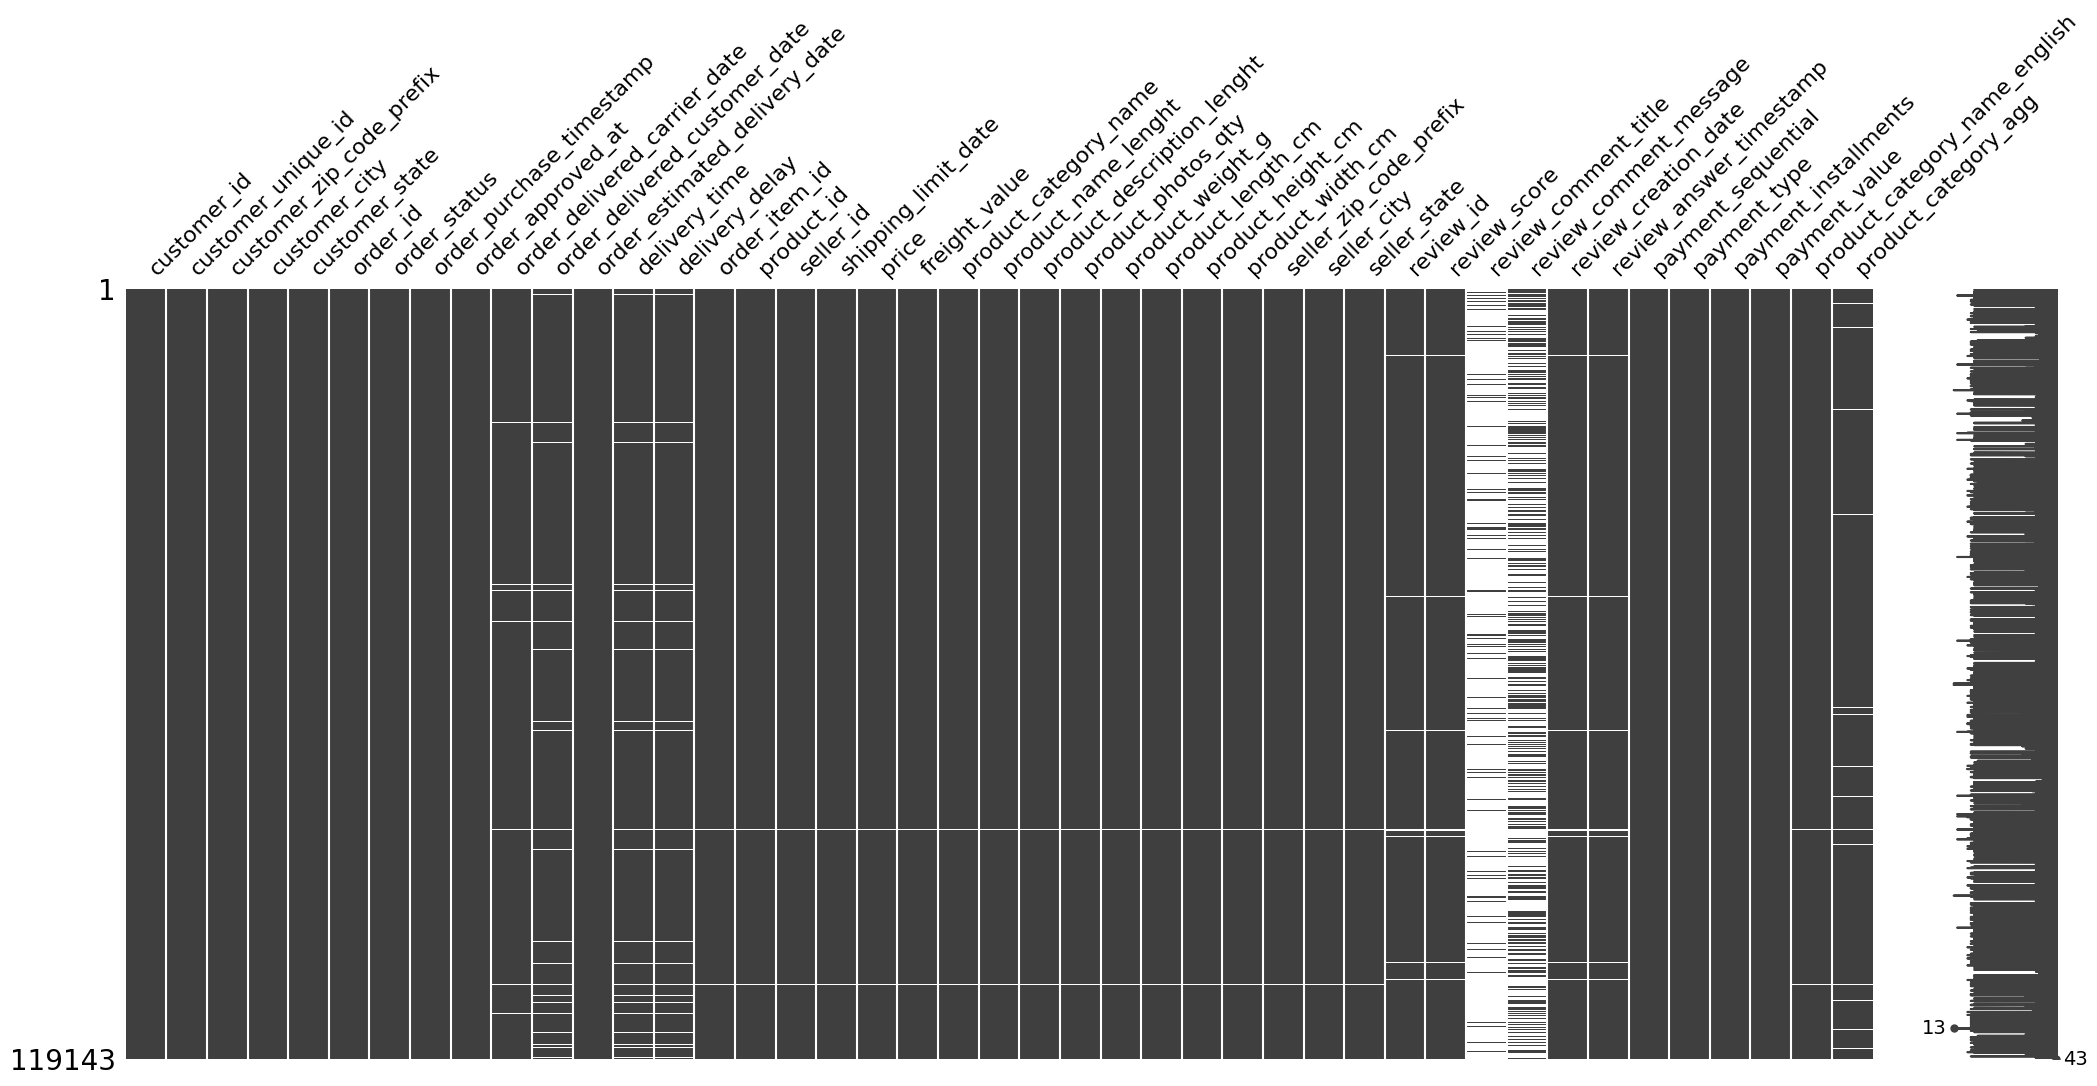

In [35]:
msno.matrix(db_df)

<p style="font-family:times;font-size:15px">
   Notre base de données contient des clients qui se sont répétés. Cependant nous voulions une base qui a des clients qui se répètent juste une fois. Ainsi, nous allons faire quelque calculs sur ces clients en vue d'avoir une base finale. Les variables suivantes seront créées : </p>

<h3 style="text-align:justify;color:black;font-size:26px;font-family:Georgia">C. Feature Engineering</h3>

<ul style="font-family:times;font-size:15px; text-align: justify;">
    <li>
        <strong>Nombre de commandes par client (<code>nb_orders</code>)</strong>
        <ul style="font-family:times;font-size:15px; text-align: justify;">
            <li><strong>Description:</strong> Le nombre total de commandes uniques passées par chaque client.</li>
            <li><strong>Calcul:</strong> Comptage des <code>customer_id</code> uniques groupés par <code>customer_unique_id</code>.</li>
        </ul>
    </li>
    <li>
        <strong>Nombre total de produits commandés par client (<code>total_products_ordered</code>)</strong>
        <ul style="font-family:times;font-size:15px; text-align: justify;">
            <li><strong>Description:</strong> La quantité totale de produits commandés par chaque client.</li>
            <li><strong>Calcul:</strong> Somme du maximum de <code>order_item_id</code> pour chaque commande, groupée par <code>customer_unique_id</code>.</li>
        </ul>
    </li>
    <li>
        <strong>Nombre moyen de produits par commande (<code>mean_nb_products</code>)</strong>
        <ul style="font-family:times;font-size:15px; text-align: justify;">
            <li><strong>Description:</strong> Le nombre moyen de produits par commande pour chaque client.</li>
            <li><strong>Calcul:</strong> Moyenne du maximum de <code>order_item_id</code> pour chaque commande, groupée par <code>customer_unique_id</code>.</li>
        </ul>
    </li>
    <li>
        <strong>Montant total payé par client (<code>total_paid</code>)</strong>
        <ul style="font-family:times;font-size:15px; text-align: justify;">
            <li><strong>Description:</strong> Le montant total d'argent dépensé par chaque client.</li>
            <li><strong>Calcul:</strong> Somme de <code>price</code> groupée par <code>customer_unique_id</code>.</li>
        </ul>
    </li>
    <li>
        <strong>Prix moyen par commande (<code>mean_order_price</code>)</strong>
        <ul style="font-family:times;font-size:15px; text-align: justify;">
            <li><strong>Description:</strong> Le prix moyen d'une commande pour chaque client.</li>
            <li><strong>Calcul:</strong> Moyenne de la somme de <code>price</code> par commande, groupée par <code>customer_unique_id</code>.</li>
        </ul>
    </li>
    <li>
        <strong>Prix moyen par produit (<code>mean_product_price</code>)</strong>
        <ul style="font-family:times;font-size:15px; text-align: justify;">
            <li><strong>Description:</strong> Le prix moyen des produits achetés par chaque client.</li>
            <li><strong>Calcul:</strong> Moyenne de <code>price</code> groupée par <code>customer_unique_id</code>.</li>
        </ul>
    </li>
    <li>
        <strong>Longueur moyenne des descriptions de produits commandés (<code>mean_prod_descr_length</code>)</strong>
        <ul style="font-family:times;font-size:15px; text-align: justify;">
            <li><strong>Description:</strong> La longueur moyenne des descriptions de produits commandés par chaque client.</li>
            <li><strong>Calcul:</strong> Moyenne de <code>product_description_lenght</code> groupée par <code>customer_unique_id</code>.</li>
        </ul>
    </li>
    <li>
        <strong>Quantité moyenne de photos pour les produits commandés (<code>mean_photo_qty_for_ordered_prods</code>)</strong>
        <ul style="font-family:times;font-size:15px; text-align: justify;">
            <li><strong>Description:</strong> Le nombre moyen de photos disponibles pour les produits commandés par chaque client.</li>
            <li><strong>Calcul:</strong> Moyenne de <code>product_photos_qty</code> groupée par <code>customer_unique_id</code>.</li>
        </ul>
    </li>
    <li>
        <strong>Score moyen des avis (<code>mean_reviews_score</code>)</strong>
        <ul style="font-family:times;font-size:15px; text-align: justify;">
            <li><strong>Description:</strong> La note moyenne des avis donnés par chaque client.</li>
            <li><strong>Calcul:</strong> Moyenne de <code>review_score</code> groupée par <code>customer_unique_id</code>.</li>
        </ul>
    </li>
    <li>
        <strong>Nombre total d'avis (<code>nb_reviews</code>)</strong>
        <ul style="font-family:times;font-size:15px; text-align: justify;">
            <li><strong>Description:</strong> Le nombre total d'avis soumis par chaque client.</li>
            <li><strong>Calcul:</strong> Comptage des <code>review_id</code> uniques groupés par <code>customer_unique_id</code>.</li>
        </ul>
    </li>
    <li>
        <strong>Date de la première commande (<code>first_order_date</code>)</strong>
        <ul style="font-family:times;font-size:15px; text-align: justify;">
            <li><strong>Description:</strong> La date de la première commande passée par chaque client.</li>
            <li><strong>Calcul:</strong> Minimum de <code>order_purchase_timestamp</code> groupé par <code>customer_unique_id</code>.</li>
        </ul>
    </li>
    <li>
        <strong>Nombre de jours depuis la dernière commande (<code>recency</code>)</strong>
        <ul style="font-family:times;font-size:15px; text-align: justify;">
            <li><strong>Description:</strong> Le nombre de jours écoulés depuis la première commande du client jusqu'à la date la plus récente dans l'ensemble de données.</li>
            <li><strong>Calcul:</strong> Différence en jours entre le maximum de <code>order_purchase_timestamp</code> et <code>first_order_date</code>.</li>
        </ul>
    </li>
    <li>
        <strong>Temps moyen de livraison (<code>mean_delivery_time</code>)</strong>
        <ul style="font-family:times;font-size:15px; text-align: justify;">
            <li><strong>Description:</strong> Le temps moyen de livraison des commandes passées par chaque client.</li>
            <li><strong>Calcul:</strong> Moyenne de <code>delivery_time</code> groupée par <code>customer_unique_id</code>.</li>
        </ul>
    </li>
    <li>
        <strong>Délai moyen de livraison (<code>mean_delivery_delay</code>)</strong>
        <ul style="font-family:times;font-size:15px; text-align: justify;">
            <li><strong>Description:</strong> Le délai moyen de livraison des commandes passées par chaque client.</li>
            <li><strong>Calcul:</strong> Moyenne de <code>delivery_delay</code> groupée par <code>customer_unique_id</code>.</li>
        </ul>
    </li>
</ul>

In [36]:
# number of orders per customer
df = pd.DataFrame(data={'nb_orders': db_df.groupby('customer_unique_id')['customer_id'].nunique(dropna=True)})

# total number of products ordered per customer
df['total_products_ordered'] = db_df.groupby(['customer_unique_id', 'order_id'])['order_item_id'].max().groupby('customer_unique_id').sum()

# mean number of product per order
df['mean_nb_products'] = db_df.groupby(['customer_unique_id', 'order_id'])['order_item_id'].max().groupby('customer_unique_id').mean()

# total paid
df['total_paid'] = db_df.groupby('customer_unique_id')['price'].sum()

# mean order price
df['mean_order_price'] = db_df.groupby(['customer_unique_id', 'order_id'])['price'].sum().groupby('customer_unique_id').mean()

# mean product price
df['mean_product_price'] = db_df.groupby('customer_unique_id')['price'].mean()

# mean description length for ordered products
df['mean_prod_descr_length'] = db_df.groupby('customer_unique_id')['product_description_lenght'].mean()

# mean photos qty for ordered products
df['mean_photo_qty_for_ordered_prods'] = db_df.groupby('customer_unique_id')['product_photos_qty'].mean()

# mean review score
df['mean_reviews_score'] = db_df.groupby('customer_unique_id')['review_score'].mean()

# total number of reviews
df['nb_reviews'] = db_df.groupby('customer_unique_id')['review_id'].nunique()

# first order date
df['first_order_date'] = db_df.groupby('customer_unique_id')['order_purchase_timestamp'].min()

# last order date
df['last_order_date'] = db_df.groupby('customer_unique_id')['order_purchase_timestamp'].max()

# days since the last order
df['recency'] = pd.to_timedelta(db_df['order_purchase_timestamp'].max() - df['last_order_date']).dt.days

# mean delivery time
df['mean_delivery_time'] = db_df.groupby('customer_unique_id')['delivery_time'].mean(numeric_only=False)

# mean delivery delay
df['mean_delivery_delay'] = db_df.groupby('customer_unique_id')['delivery_delay'].mean(numeric_only=False)

<p style="font-family:times;font-size:15px; text-align: justify;">
Pour éviter les valeurs nulles dues à des divisions par zéro dans les colonnes de moyennes, nous remplissons les valeurs nulles avec zéro. Cela permet de maintenir la cohérence et l'exactitude des analyses statistiques et des agrégations.
</p>

In [37]:
for col in df.columns:
    if 'mean' in col:
        df[col] = df[col].fillna(0)

In [38]:
def mode_w_nan(series):
    if all(([x is np.nan for x in series])):
        return 'unknown'
    return pd.Series.mode(series)[0]  # if multiple items are returned, take the first


# favorite product category
df['favorite_category'] = db_df.groupby('customer_unique_id')['product_category_agg'].agg(mode_w_nan)

# favorite payment type
df['favorite_payment_type'] = db_df.groupby('customer_unique_id')['payment_type'].agg(mode_w_nan)

# favorite seller id
df['favorite_seller_id'] = db_df.groupby('customer_unique_id')['seller_id'].agg(mode_w_nan)

<ul style="font-family:times;font-size:15px; text-align: justify;">
    <li>
        <strong>Définition de la Fonction <code>mode_w_nan</code></strong>
        <ul style="font-family:times;font-size:15px; text-align: justify;">
            <li><strong>Description:</strong> La fonction <code>mode_w_nan</code> encapsule la fonction <code>mode</code> de pandas pour gérer les valeurs nulles dans une série.</li>
            <li><strong>Pourquoi:</strong> Si toutes les valeurs de la série sont nulles, la fonction retourne 'unknown'. Sinon, elle retourne la première valeur mode.</li>
        </ul>
    </li>
    <li>
        <strong>Catégorie de Produit Favorite</strong>
        <ul style="font-family:times;font-size:15px; text-align: justify;">
            <li><strong>Description:</strong> La colonne <code>favorite_category</code> indique la catégorie de produit la plus fréquemment achetée par chaque client.</li>
            <li><strong>Calcul:</strong> Nous groupons les données par <code>customer_unique_id</code> et appliquons <code>mode_w_nan</code> sur la colonne <code>product_category_agg</code>.</li>
        </ul>
    </li>
    <li>
        <strong>Type de Paiement Favori</strong>
        <ul style="font-family:times;font-size:15px; text-align: justify;">
            <li><strong>Description:</strong> La colonne <code>favorite_payment_type</code> indique le type de paiement le plus souvent utilisé par chaque client.</li>
            <li><strong>Calcul:</strong> Nous groupons les données par <code>customer_unique_id</code> et appliquons <code>mode_w_nan</code> sur la colonne <code>payment_type</code>.</li>
        </ul>
    </li>
    <li>
        <strong>Vendeur Favori</strong>
        <ul style="font-family:times;font-size:15px; text-align: justify;">
            <li><strong>Description:</strong> La colonne <code>favorite_seller_id</code> indique l'identifiant du vendeur auprès duquel chaque client achète le plus fréquemment.</li>
            <li><strong>Calcul:</strong> Nous groupons les données par <code>customer_unique_id</code> et appliquons <code>mode_w_nan</code> sur la colonne <code>seller_id</code>.</li>
        </ul>
    </li>
</ul>
<p style="font-family:times;font-size:15px; text-align: justify;">
Ces actions nous permettent d'identifier les préférences des clients, ce qui est essentiel pour personnaliser les offres et améliorer la satisfaction client.
</p>

<p style="font-family:times;font-size:15px; text-align: justify;">
Nous allons à présent ajouter les informations sur le client lui-même à savoir son lieu de résidence et pleins d'autre choses.
</p>

In [39]:
# adding customer zip code + city + state
df = df.join(customers[['customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']].drop_duplicates(subset='customer_unique_id').set_index('customer_unique_id'))

In [40]:
df.to_csv(Path(DATA, "data_final_1.csv"), index=False)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96096 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   nb_orders                         96096 non-null  int64         
 1   total_products_ordered            96096 non-null  float64       
 2   mean_nb_products                  96096 non-null  float64       
 3   total_paid                        96096 non-null  float64       
 4   mean_order_price                  96096 non-null  float64       
 5   mean_product_price                96096 non-null  float64       
 6   mean_prod_descr_length            96096 non-null  float64       
 7   mean_photo_qty_for_ordered_prods  96096 non-null  float64       
 8   mean_reviews_score                96096 non-null  float64       
 9   nb_reviews                        96096 non-null  int64        

Final dataframe : 96096 rows / 21 columns


<Axes: >

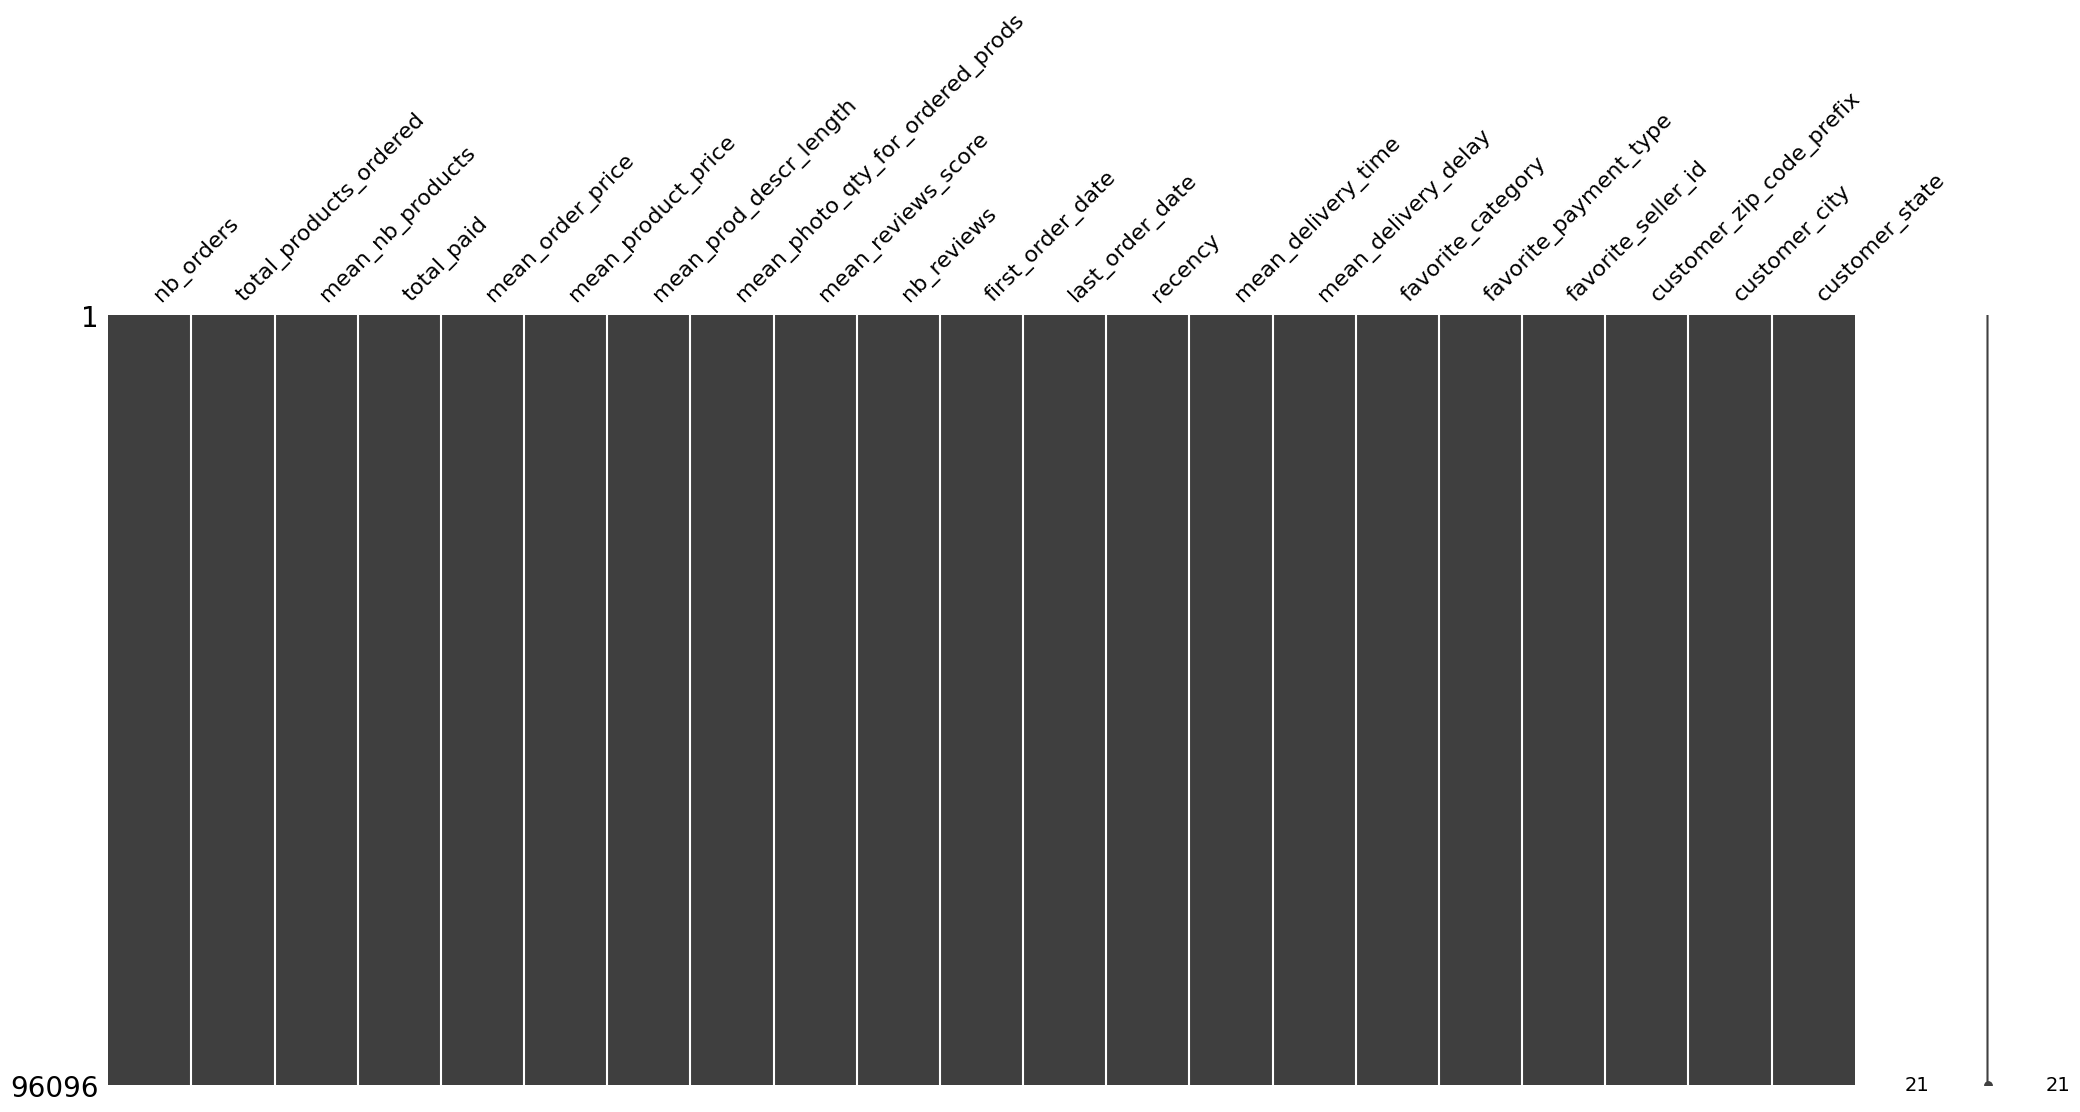

In [42]:
print("Final dataframe : {} rows / {} columns".format(df.shape[0], df.shape[1]))
msno.matrix(df)

<h2 style="text-align:justify;color:blue;font-size:30px;font-family:ALGERIAN">III. ANALYSE EXPLORATOIRE</h2>

<h3 style="text-align:justify;color:black;font-size:26px;font-family:Georgia">A. Localisation de nos clients</h3>

In [43]:
# adding the geolocation of each customers
df_cust_geo = pd.merge(left=df['customer_zip_code_prefix'], right=geolocation[['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']].groupby('geolocation_zip_code_prefix').median(), left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left').set_axis(df.index)

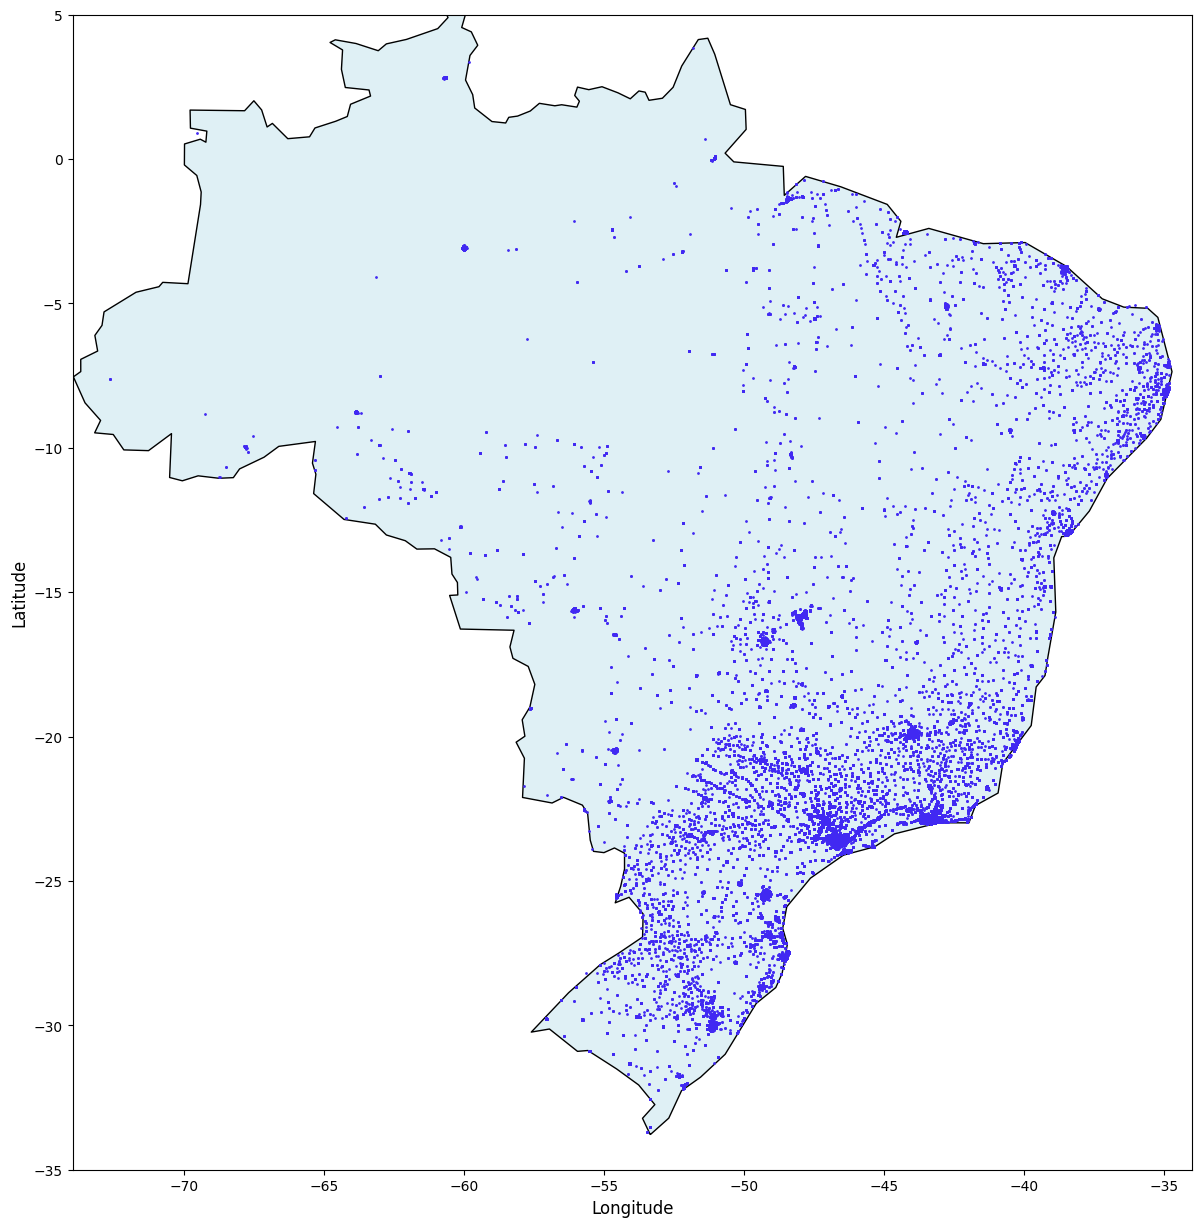

In [44]:
import geopandas as gpd
# Charger le fichier de données naturelles de basse résolution
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filtrer pour garder uniquement le Brésil
brazil = world[world.name == 'Brazil']

# Tracer la carte du Brésil
ax = brazil.plot(figsize=(20, 15), edgecolor='black', color='#dff0f5')

# Ajouter les points de géolocalisation des clients
ax.scatter(df_cust_geo['geolocation_lng'], df_cust_geo['geolocation_lat'], c='#4129f2', s=1, alpha=1)
ax.set_xlim([-74, -34])
ax.set_ylim([-35, 5])
# Ajouter les labels pour les axes
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Afficher la carte
plt.show()

<p style="font-family:times;font-size:15px">
   On voit une concentration des clients de Olist vers le sud et l'Est du pays. A l'opposé le Nord et le Nord Ouest n'abrite pas assez de clients ou presque pas.  </p>

<h3 style="text-align:justify;color:black;font-size:26px;font-family:Georgia">B. Analyse Univariée</h3>

<h4 style="text-align:justify;color:red;font-size:20px;font-family:Georgia">1. Variables numériques</h4>

In [45]:
df.describe()

,nb_orders,total_products_ordered,mean_nb_products,total_paid,mean_order_price,mean_product_price,mean_prod_descr_length,mean_photo_qty_for_ordered_prods,mean_reviews_score,nb_reviews,first_order_date,last_order_date,recency,mean_delivery_time,mean_delivery_delay
count,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000,96096.00000,96096,96096,96096.000000,96096.000000,96096.000000
mean,1.034809,1.172265,1.131087,148.535836,143.745118,125.631146,778.823368,2.207134,4.054262,1.02408,2017-12-30 19:19:10.429206016,2018-01-02 12:40:19.655864832,287.735691,11.756991,-11.512973
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2016-09-04 21:15:19,2016-09-04 21:15:19,0.000000,0.000000,-147.000000
25%,1.000000,1.000000,1.000000,47.900000,46.900000,41.490000,342.000000,1.000000,4.000000,1.00000,2017-09-11 19:52:06,2017-09-15 09:04:17.249999872,163.000000,6.000000,-17.000000
50%,1.000000,1.000000,1.000000,89.900000,89.000000,79.000000,599.000000,1.500000,5.000000,1.00000,2018-01-18 13:33:08,2018-01-21 19:39:16,268.000000,10.000000,-12.000000
75%,1.000000,1.000000,1.000000,159.900000,153.780000,139.900000,985.000000,3.000000,5.000000,1.00000,2018-05-04 10:38:45,2018-05-06 20:14:49.750000128,397.000000,15.000000,-7.000000
max,17.000000,24.000000,21.000000,13440.000000,13440.000000,6735.000000,3992.000000,20.000000,5.000000,17.00000,2018-10-17 17:30:18,2018-10-17 17:30:18,772.000000,209.000000,188.000000
std,0.214384,0.627071,0.533585,249.358758,241.697765,191.367640,653.404913,1.746627,1.382389,0.22299,NaN,NaN,153.414676,9.628972,10.189478


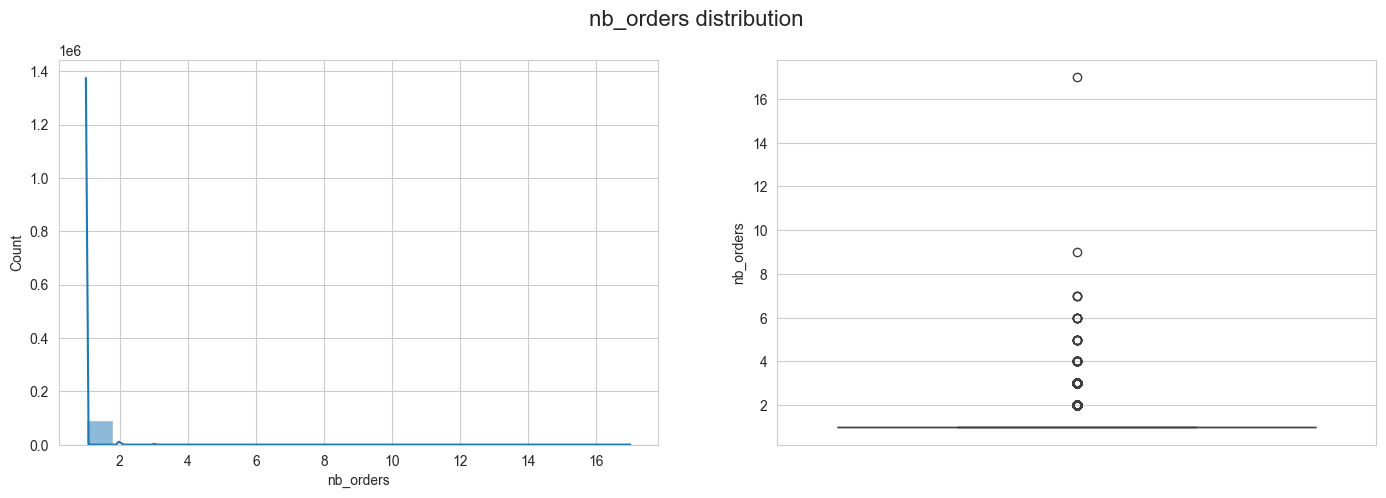

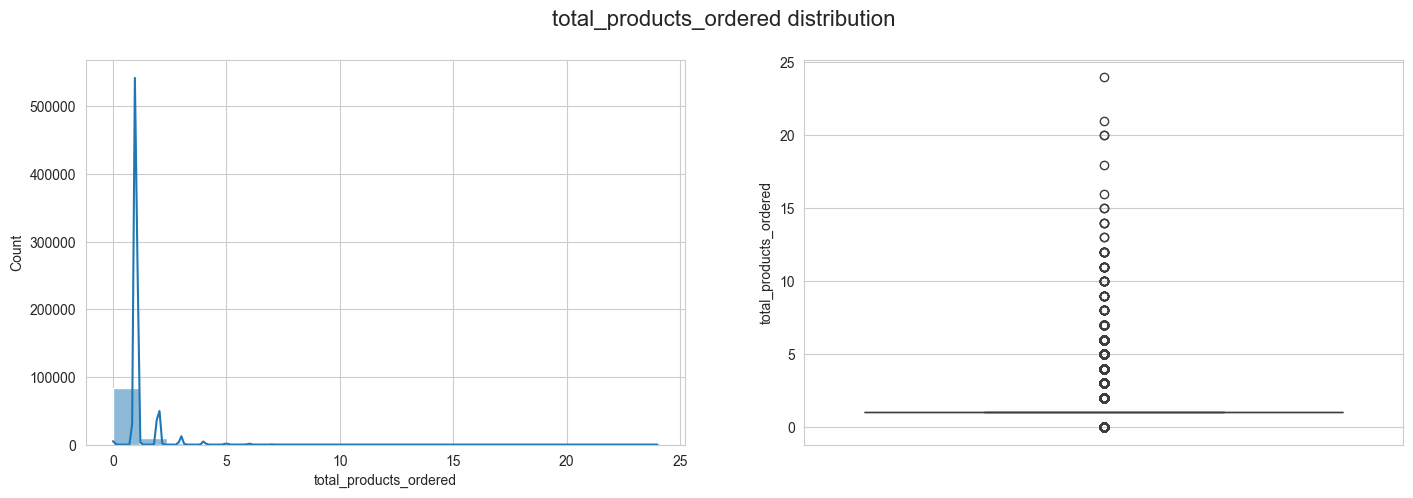

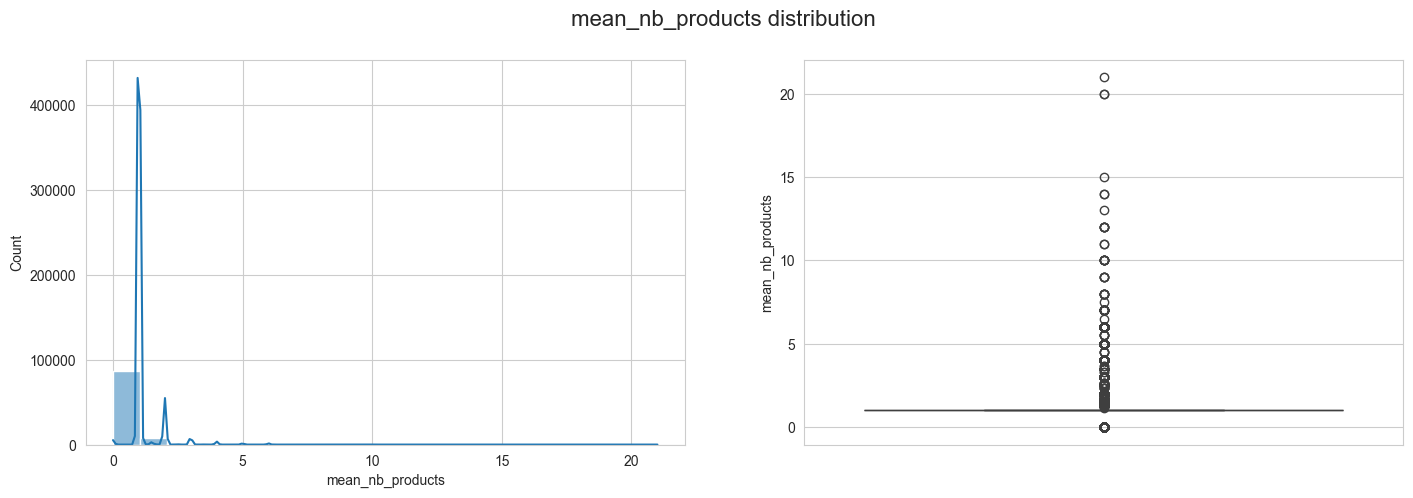

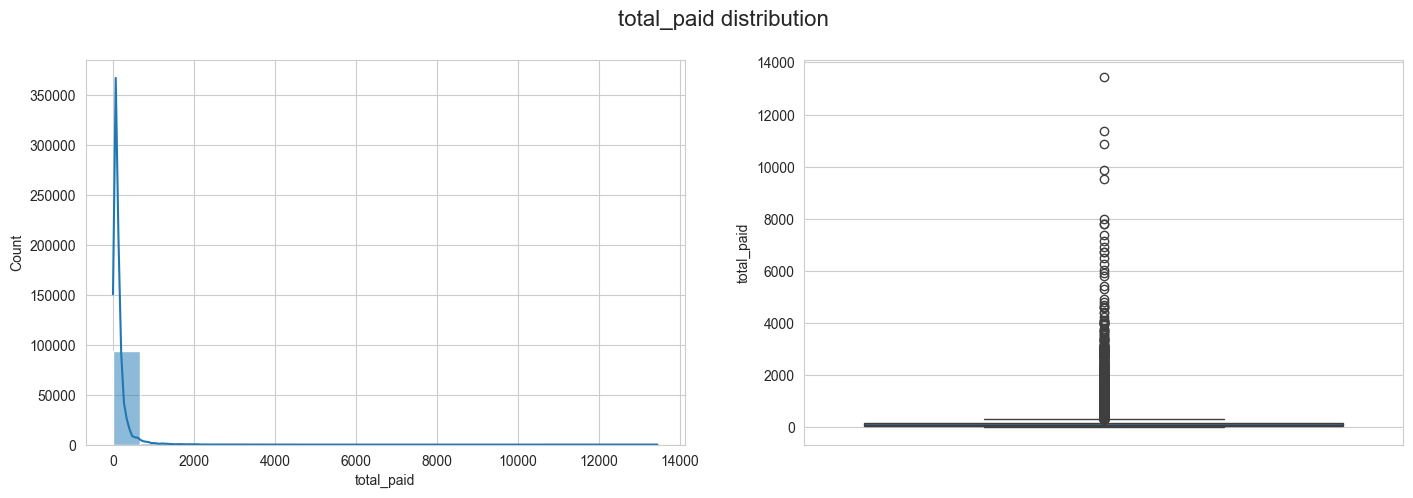

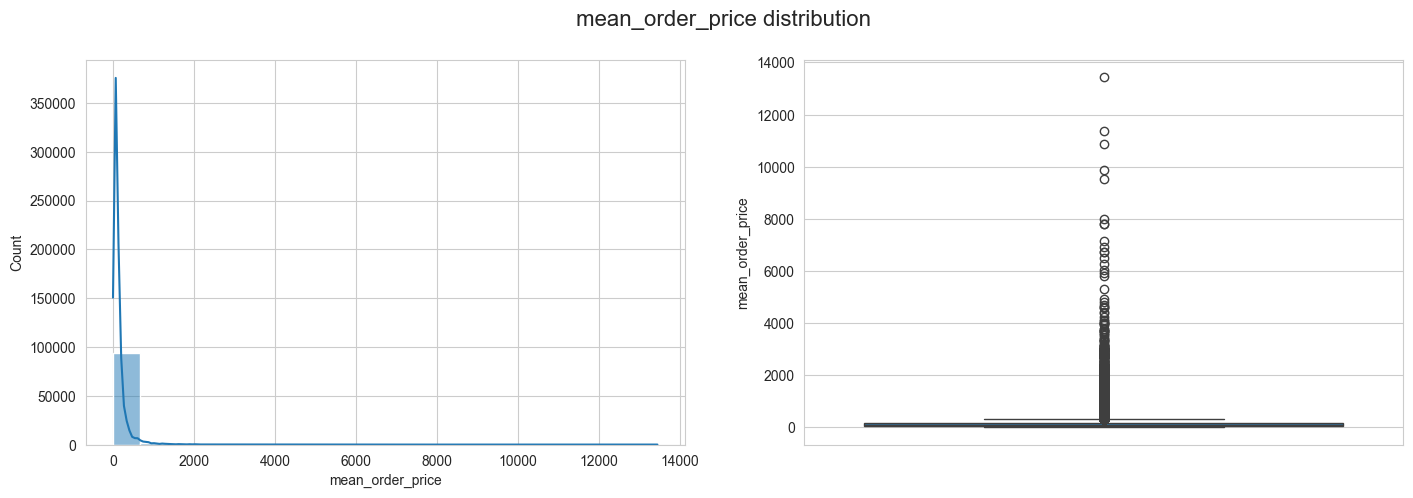

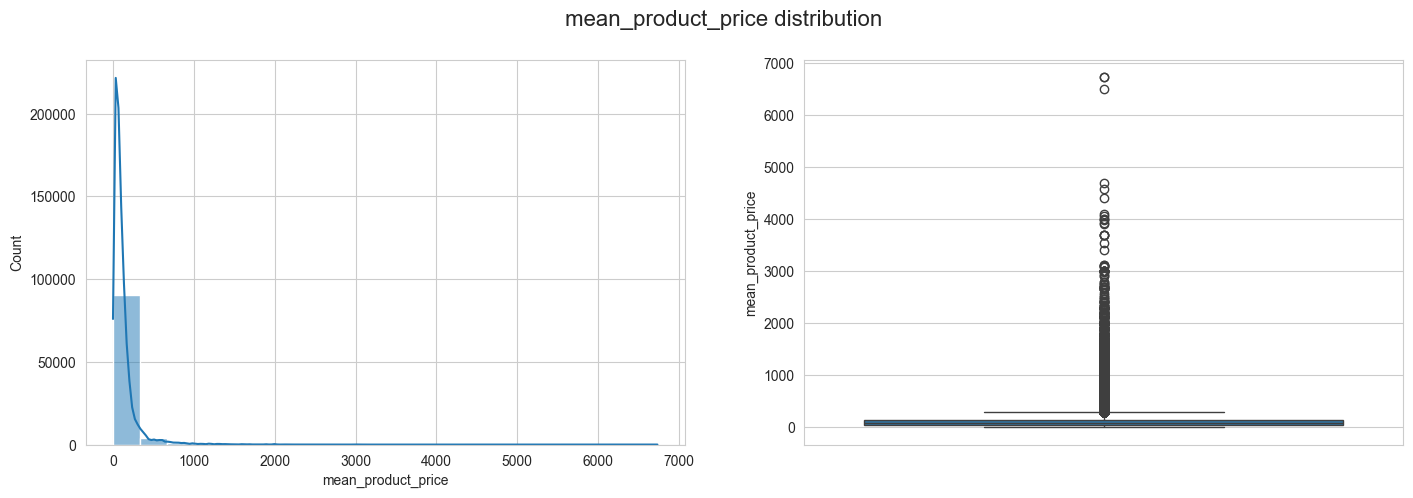

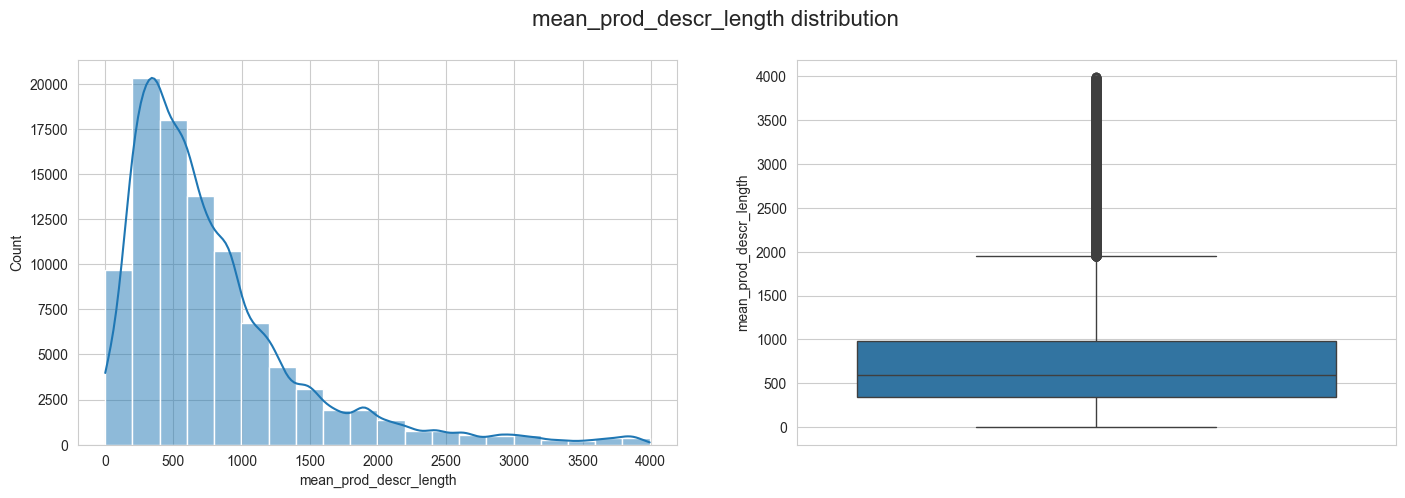

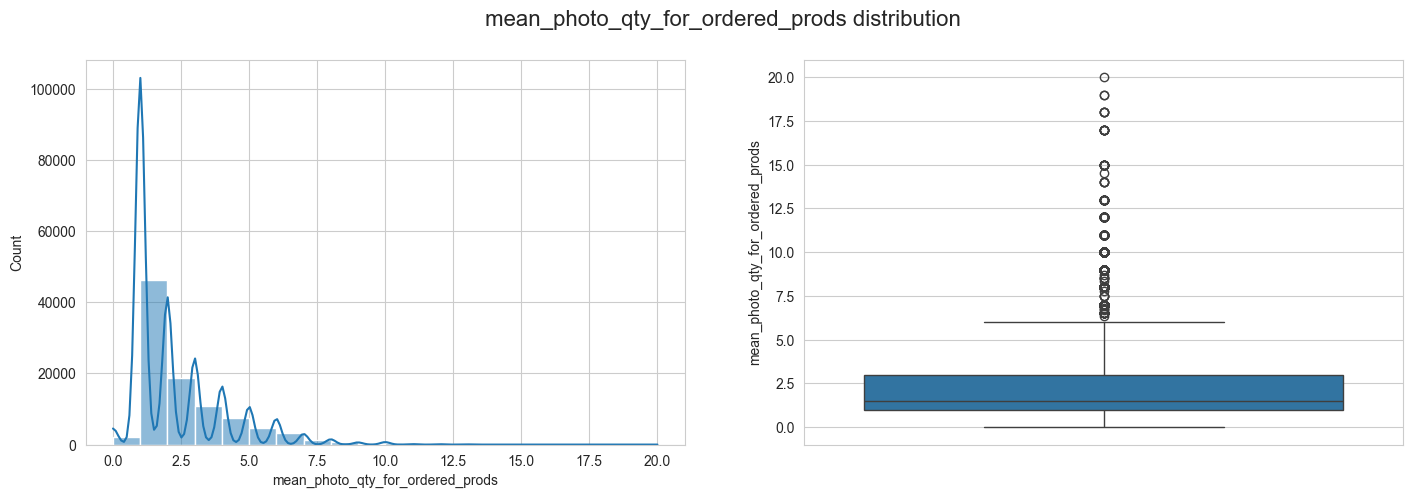

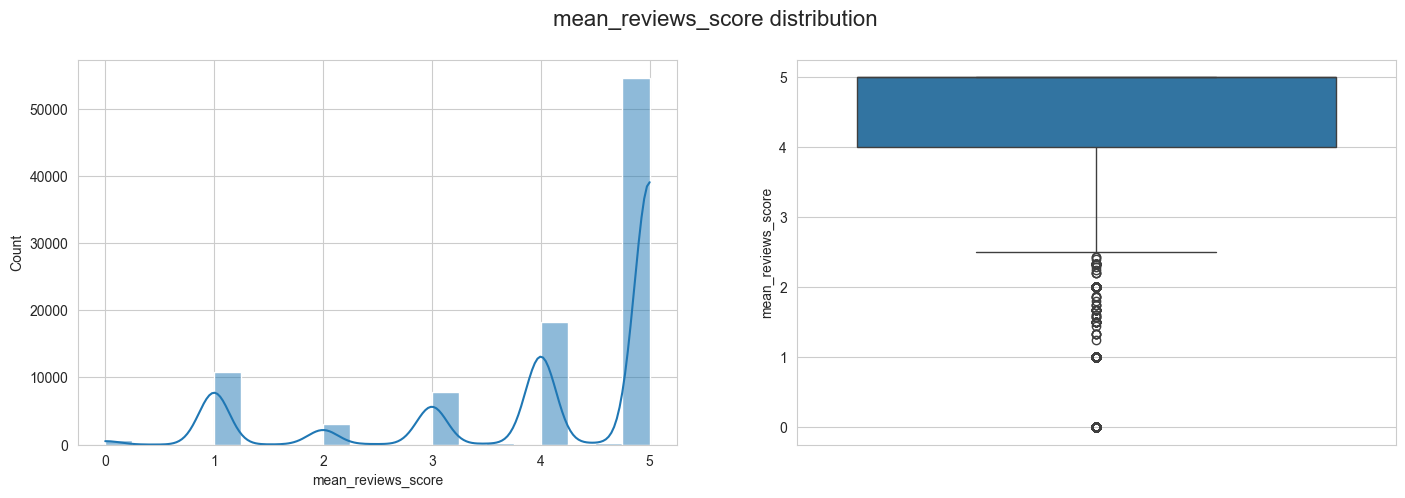

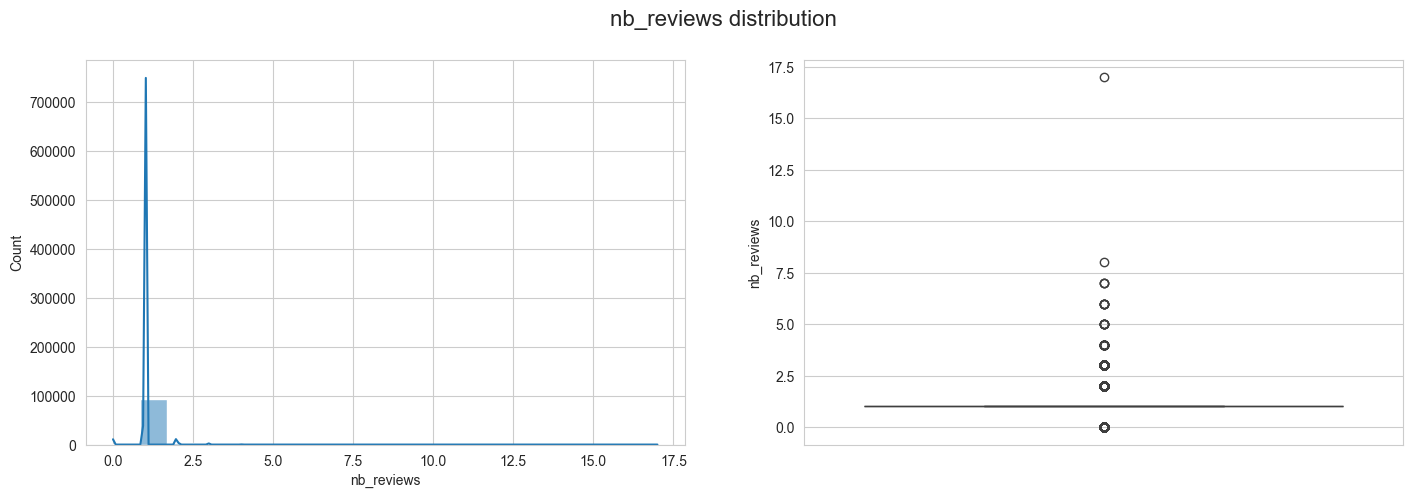

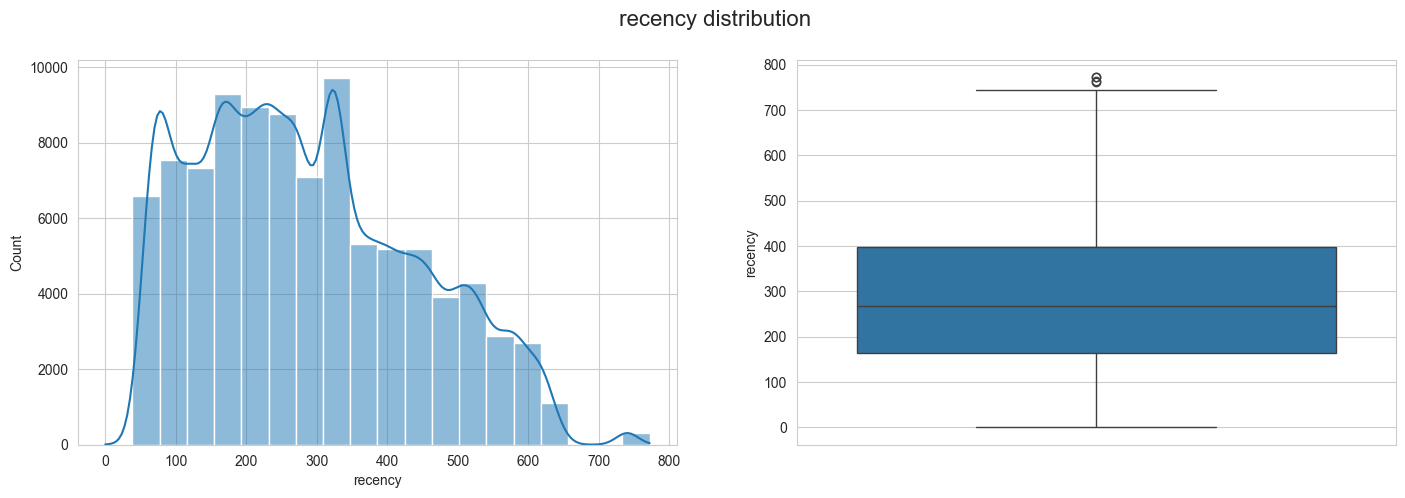

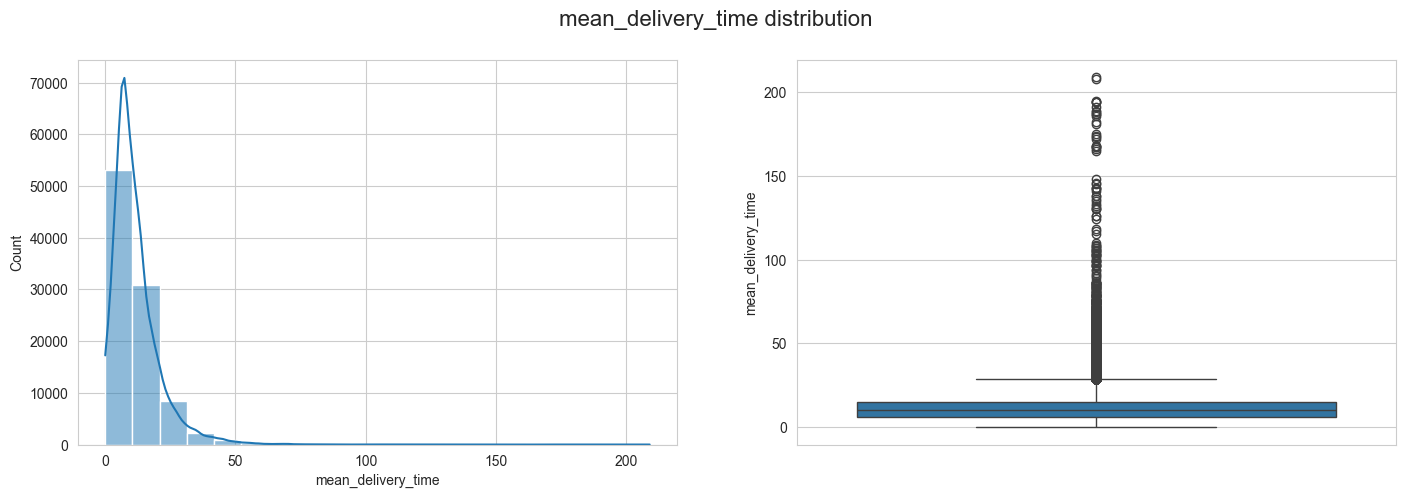

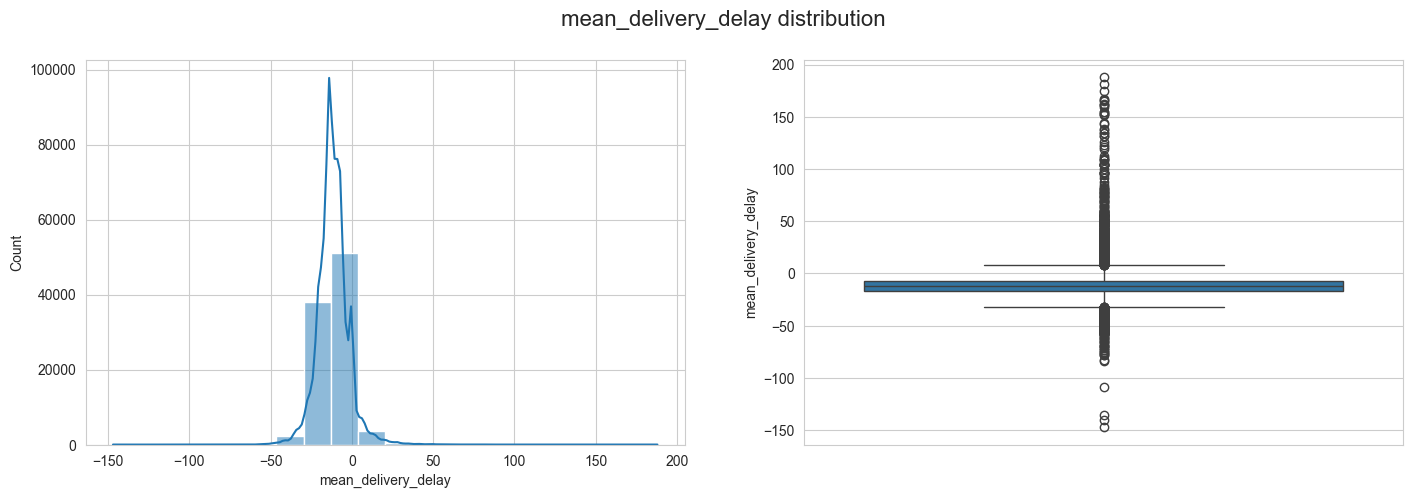

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
for column in df.select_dtypes(['int64', 'float64']).columns:
    f, axes = plt.subplots(1, 2, figsize=(17, 5))
    f.suptitle('{} distribution'.format(column), fontsize=16)
    sns.histplot(data=df[column], bins=20, ax=axes[0], kde=True)
    sns.boxplot(data=df[column], ax=axes[1])
    plt.show()

Les différents graphes ci-dessus donnent l'histogramme des fréquences ainsi que la boite à moustache de
différentes variables telles que : le nombre de commandes, le total des commandes, le prix moyen des articles,
etc. Des graphiques, nous observons que l'hypthèse de normalité n'est pas vérifiée sur l'ensemble des données. Les données présentent également de valeurs aberrantes d'après les boxplots

<h4 style="text-align:justify;color:red;font-size:20px;font-family:Georgia">2. Variables catégorielles</h4>

<p style="font-family:times;font-size:15px">
  Dans le but de facilter les analyses, nous allons définir une fonction qui permet de représenter les 20 meilleurs catégories pour chaque variable catégorielle.  </p>

In [47]:
def display_top_X(data, col, x, title, color=None, lab_rot=90):
    top = df[col].value_counts().sort_values(ascending=False)
    if x:
        top = top.head(x)
    f, ax = plt.subplots(figsize=(15, 10))
    if color:
        sns.barplot(x=top.index, y=top.values, color=color)
    else:
        sns.barplot(x=top.index, y=top.values, palette='muted')
    plt.title(title, fontsize=13)
    plt.ylabel('Count of Customers')
    plt.xticks(rotation=lab_rot, fontsize=10)
    plt.show()

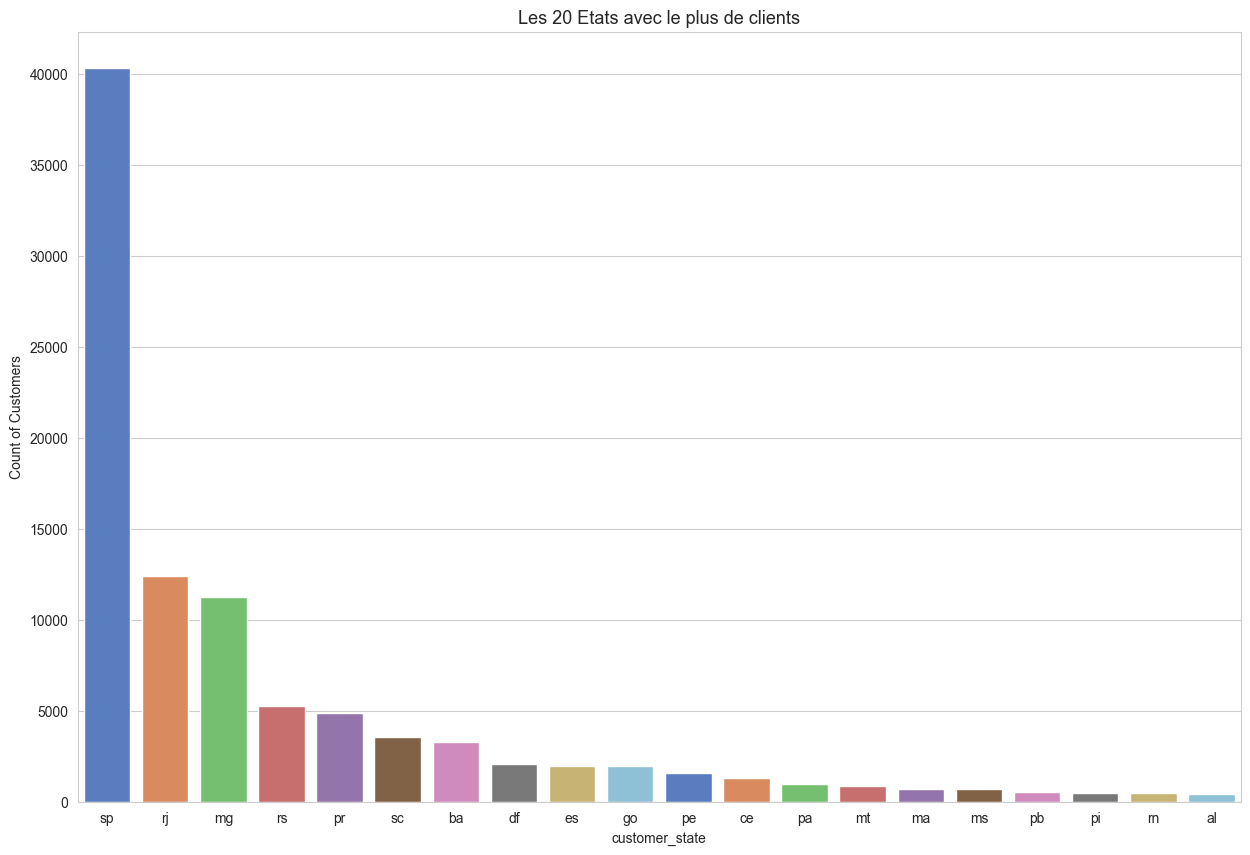

In [48]:
display_top_X(df, 'customer_state', 20, 'Les 20 Etats avec le plus de clients', lab_rot=0)

L'histogramme ci-dessus présente le top 20 des Etats en achat auprès de Olist. L'Espagne se classe
premier devant tous ces pays

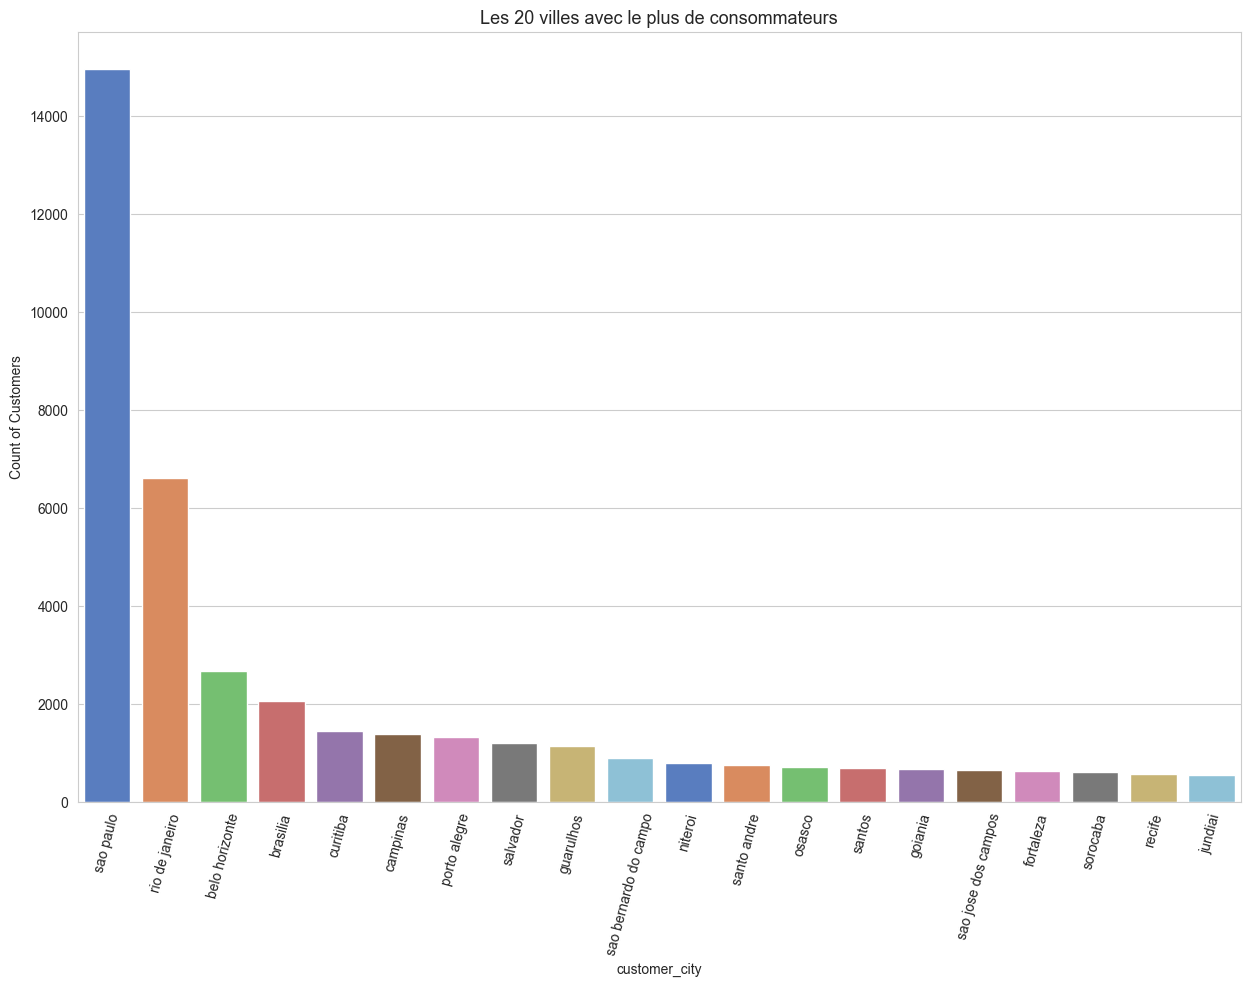

In [49]:
display_top_X(df, 'customer_city', 20, 'Les 20 villes avec le plus de consommateurs', lab_rot=75)

L'histogramme ci-dessus présente le top 20 des villes en achat auprès de Olist. La ville de Sao paulo se classe
premier devant toutes ces villes.

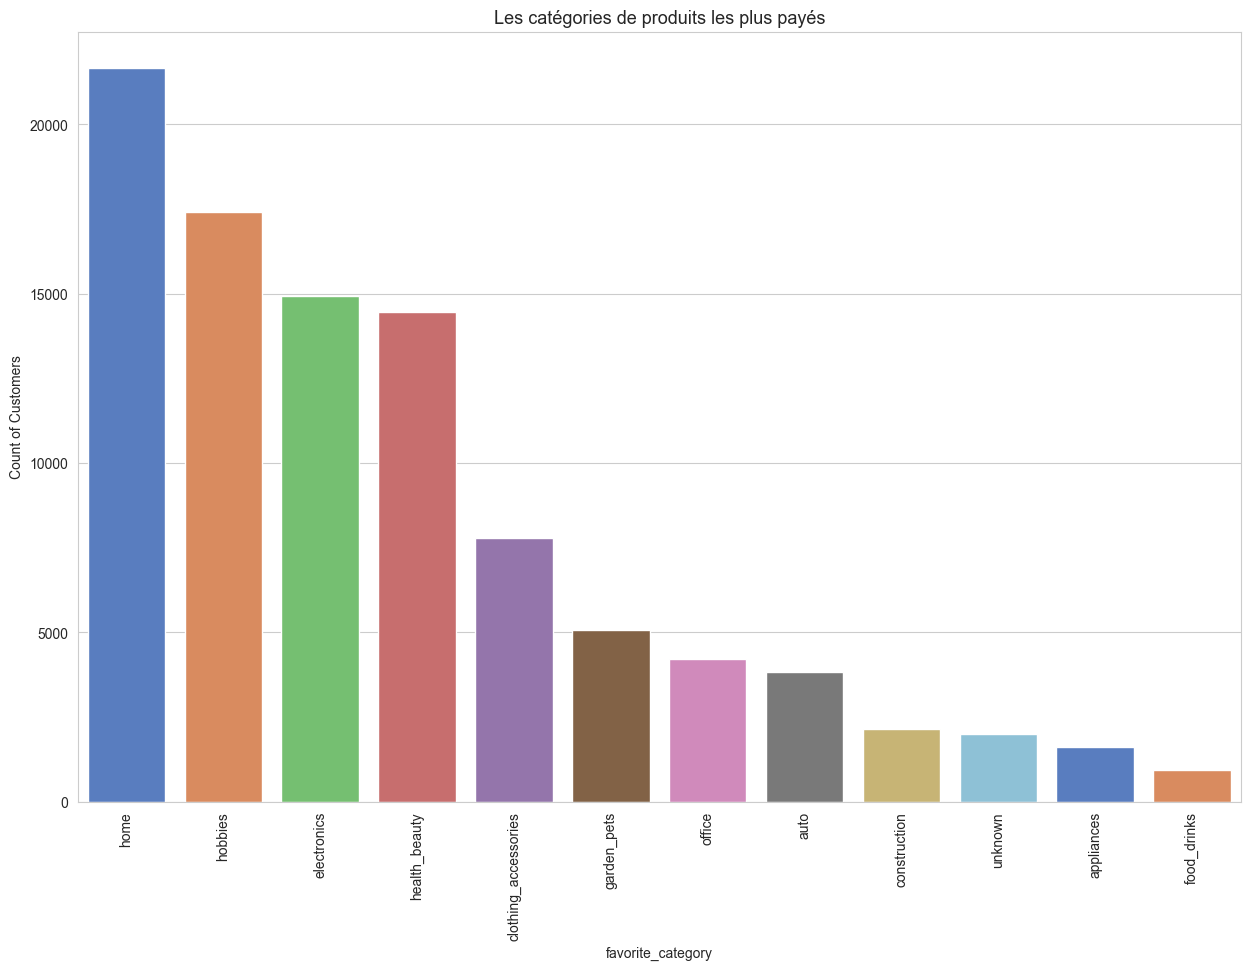

In [50]:
display_top_X(df, 'favorite_category', None, 'Les catégories de produits les plus payés')

Sur l'ensemble des catégories de produits vendus, les produits pour usage domestiques sont les plus vendus.

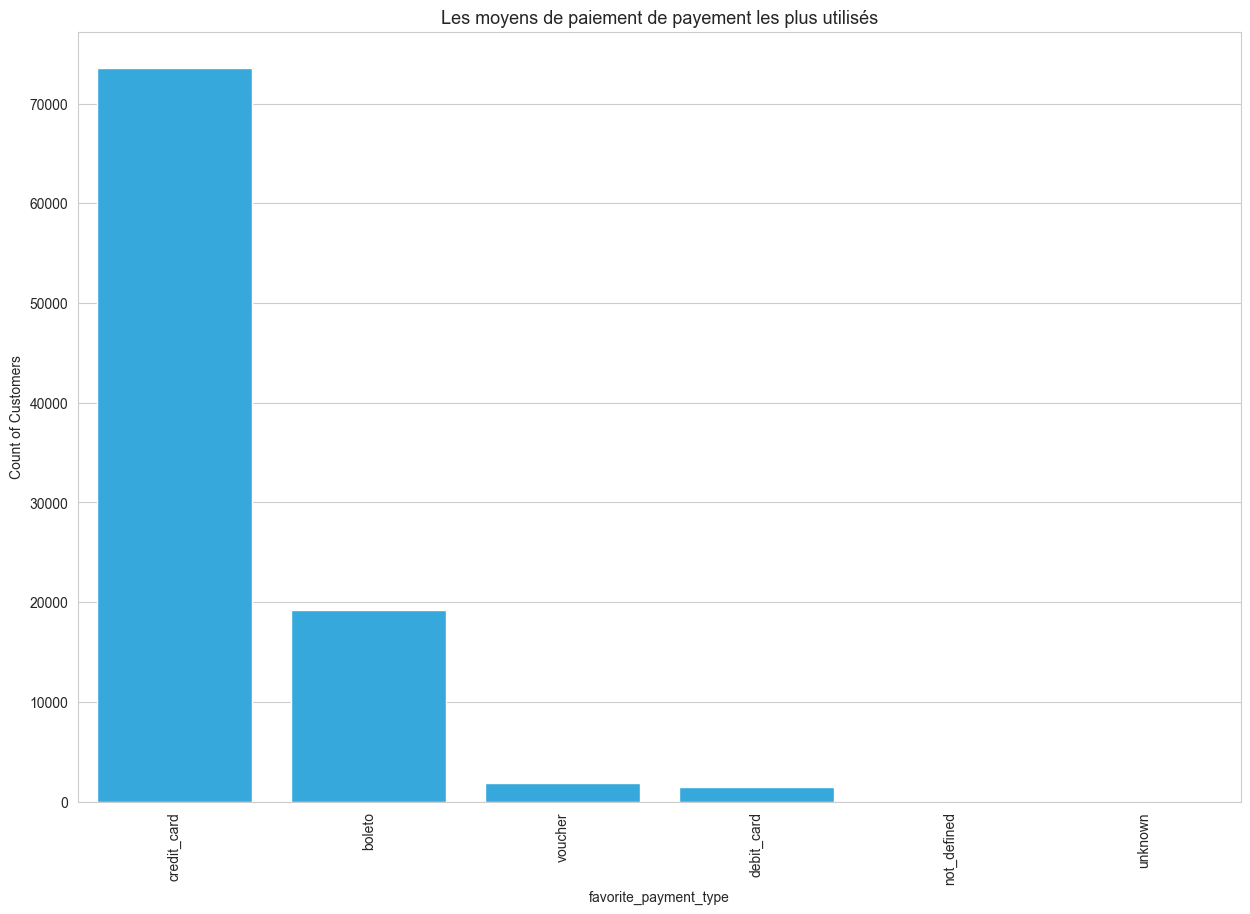

In [51]:
display_top_X(df, 'favorite_payment_type', 50, 'Les moyens de paiement de payement les plus utilisés', color='#1bb2f7')

Le graphe ci-dessus donne la distribution des moyens de paiements. De ce graphique, nous constatons
que le paiement par carte de crédit est le plus utilisé.

<h4 style="text-align:justify;color:red;font-size:20px;font-family:Georgia">3. Séries temporelles</h4>

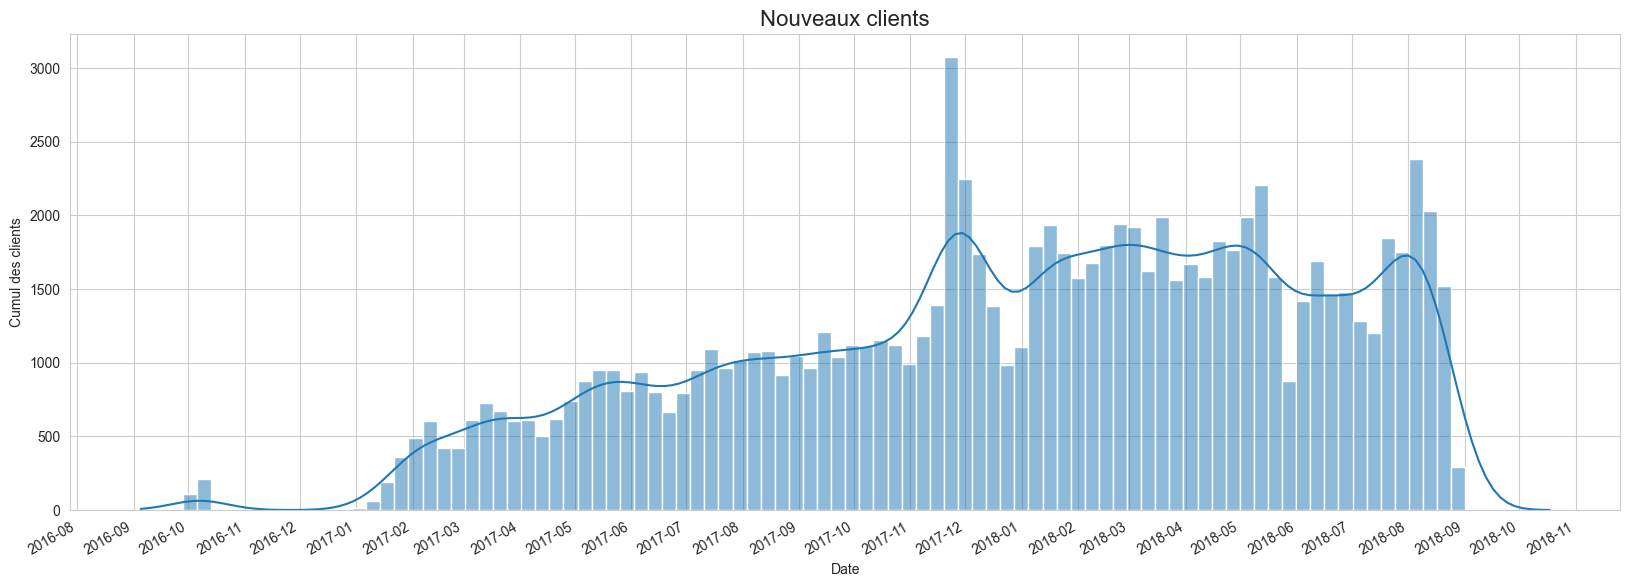

In [52]:
f, ax = plt.subplots(figsize=(20, 7))
sns.histplot(data=df['first_order_date'], bins=100, kde=True, ax=ax)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()
plt.title('Nouveaux clients', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Cumul des clients')
plt.show()

Le graphe ci-dessus présente le flux des nouveaux clients au cours du temps. De ce graphique,
nous constatons que courant décembre 2017, l'entreprise a enregistré un nombre important de nouveaux clients
environ 3000.

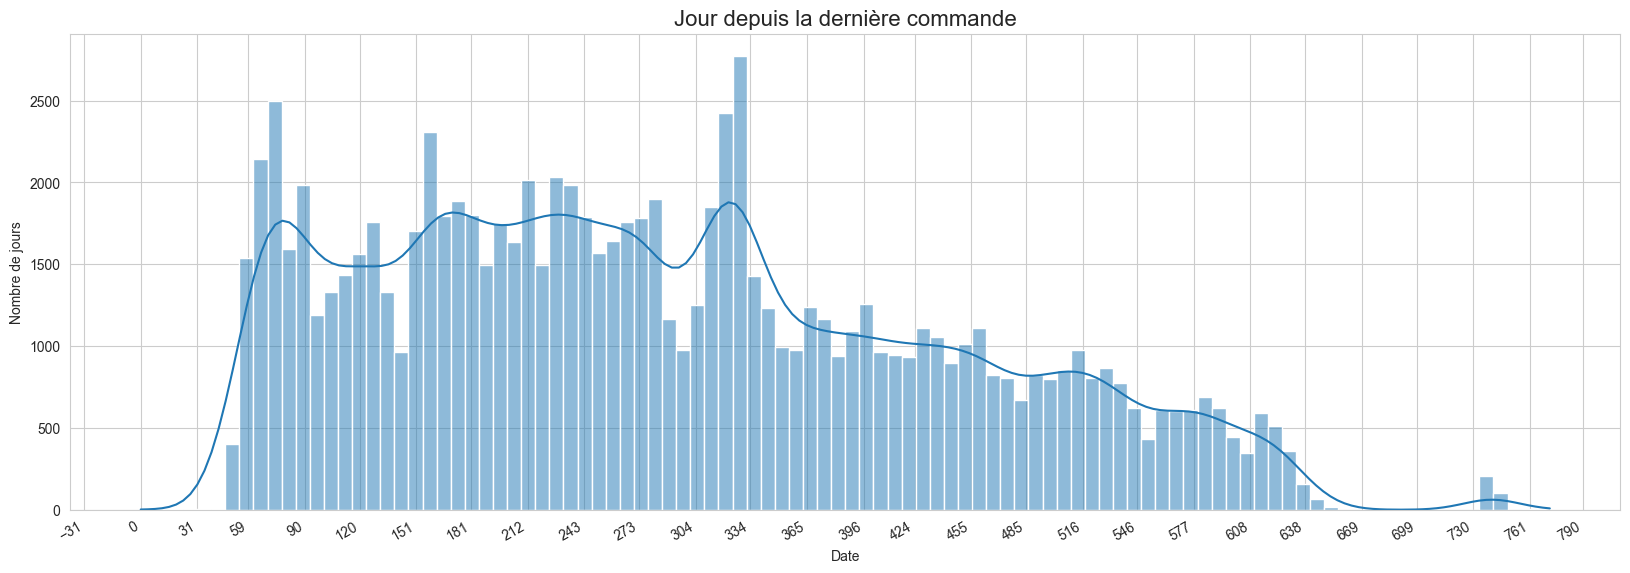

In [53]:
f, ax = plt.subplots(figsize=(20, 7))
sns.histplot(data=df['recency'], bins=100, kde=True, ax=ax)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()
plt.title('Jour depuis la dernière commande', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Nombre de jours')
plt.show()

Le graphique ci-dessus présente le nombre de jours écoulés depuis la dernière commande. De ce graphique,
nous remarquons qu'il précède au moins 59 jours de la dernière commande avant une nouvel commande.

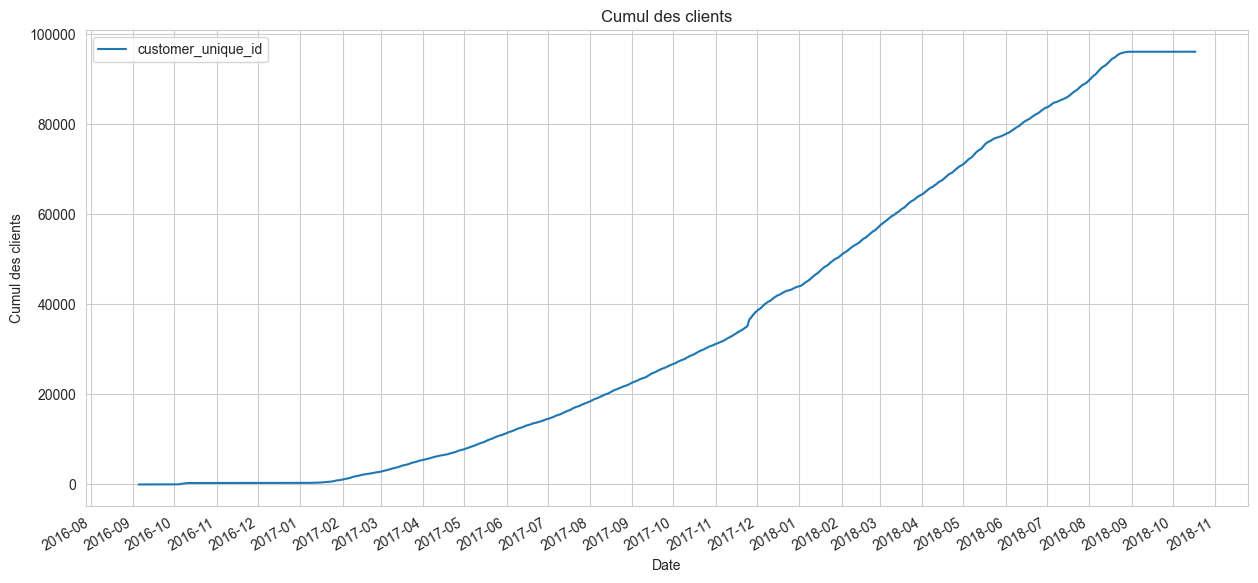

In [54]:
ax = df.reset_index()[['customer_unique_id', 'first_order_date']].groupby('first_order_date').count().cumsum().plot(figsize=(15, 7))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()
plt.title('Cumul des clients')
plt.xlabel('Date')
plt.ylabel('Cumul des clients')
plt.show()

In [ ]:
Le graphe ci-dessus donne le cumul des clients de l'entreprise Olist de la création à la date de novembre
2018. A cette date, l'entreprise compte

<h4 style="text-align:justify;color:red;font-size:20px;font-family:Georgia">4. Retour suites aux commandes</h4>

In [56]:
!pip install WordCloud

     ------------------------------------- 300.2/300.2 kB 53.9 kB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
! pip install nltk

     ---------------------------------------- 1.5/1.5 MB 90.7 kB/s eta 0:00:00
     ------------------------------------ 269.0/269.0 kB 176.3 kB/s eta 0:00:00
     -------------------------------------- 78.3/78.3 kB 272.1 kB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, SnowballStemmer, LancasterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from collections import Counter

In [60]:
data = order_reviews[order_reviews['review_comment_message'].notna()]
label_distribution = data["review_score"].value_counts()
label_distribution

review_score
5    20554
1     8745
4     5976
3     3557
2     2145
Name: count, dtype: int64

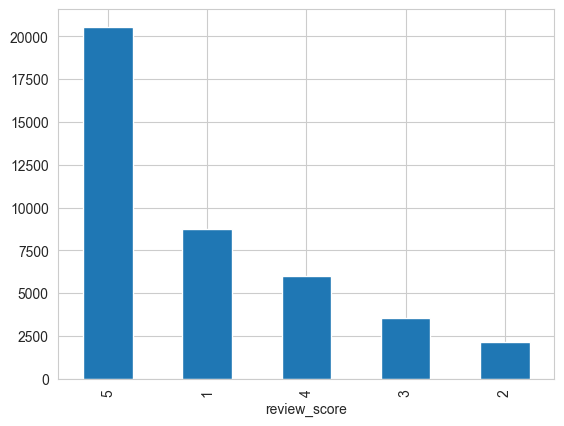

In [61]:
label_distribution.plot(kind="bar",);

<p style="font-family:times;font-size:15px"> Les commentaires faits sur les commandes reçues sont en moyenne bons. En effets, la plupart des commentaires ont un score de 4 et 5.</p>

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40977 entries, 3 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                40977 non-null  object        
 1   order_id                 40977 non-null  object        
 2   review_score             40977 non-null  int64         
 3   review_comment_title     9839 non-null   object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     40977 non-null  datetime64[ns]
 6   review_answer_timestamp  40977 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 2.5+ MB


In [63]:
# Create a word_cloud from words and frequencies.
# get all verbatim
all_text = " ".join(data.review_comment_message.str.lower())
words_frequency = Counter(all_text.split())

In [64]:
words_frequency.most_common(n=30)

[('o', 18676),
 ('e', 15582),
 ('produto', 15462),
 ('a', 12133),
 ('de', 11296),
 ('do', 11139),
 ('não', 10614),
 ('que', 8271),
 ('muito', 7568),
 ('com', 5574),
 ('antes', 5533),
 ('entrega', 5363),
 ('chegou', 5130),
 ('prazo', 5043),
 ('no', 5038),
 ('recebi', 4977),
 ('foi', 4490),
 ('é', 4475),
 ('um', 4152),
 ('da', 3509),
 ('em', 3478),
 ('entregue', 3233),
 ('bom', 3229),
 ('veio', 3185),
 ('para', 3155),
 ('na', 3019),
 ('bem', 2935),
 ('mas', 2740),
 ('recomendo', 2597),
 ('uma', 2545)]

In [65]:
import nltk
nltk.download('stopwords') 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

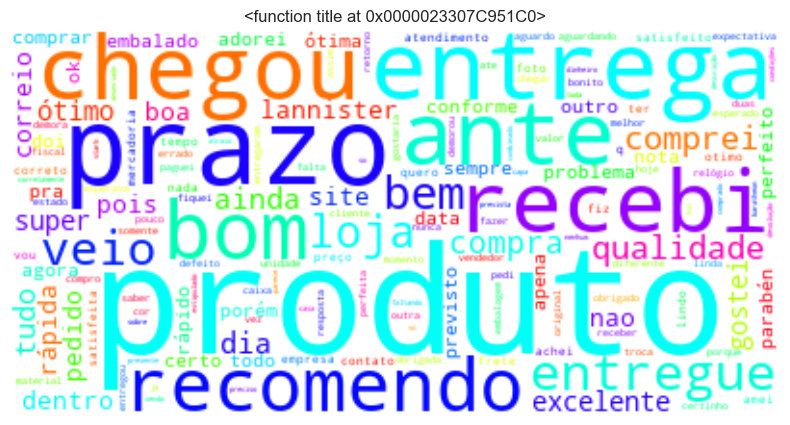

In [66]:
stopwords_nltk = set(stopwords.words('portuguese'))

def display_wordcloud(corpus):
    plt.figure(figsize=(10, 5))
    wc = WordCloud(
        background_color="white",
        max_words=1000,
        colormap='hsv',
        stopwords=stopwords_nltk,
        collocations=False) #,
        #font_path="C:\Users\DELL\Desktop\Projet ML2\Font\Roboto-Regular.ttf")  # Spécifiez le chemin de la police TrueType
    # Générer le nuage de mots
    wc.generate(corpus)
    plt.imshow(wc, interpolation="bilinear")
    plt.title(title)
    plt.axis("off")
    plt.show()    
display_wordcloud(corpus=all_text)

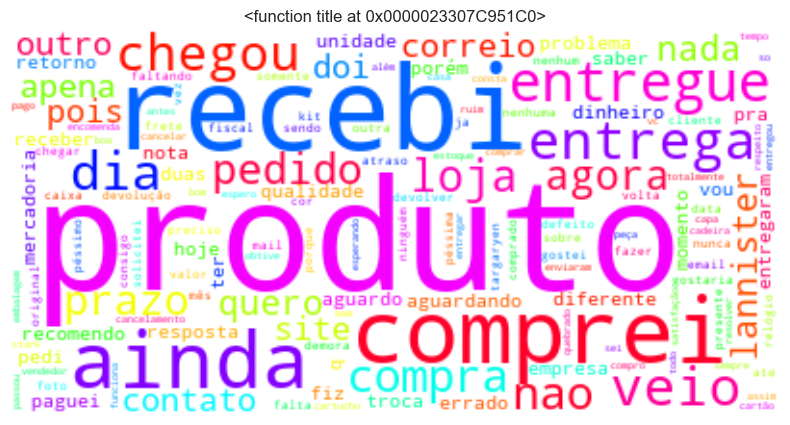

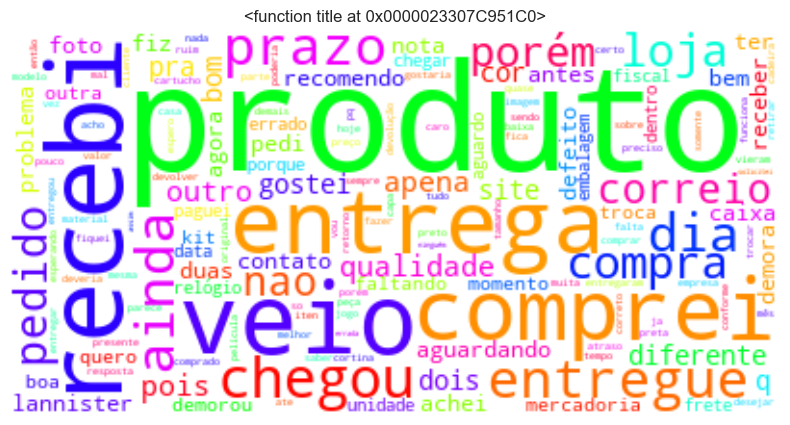

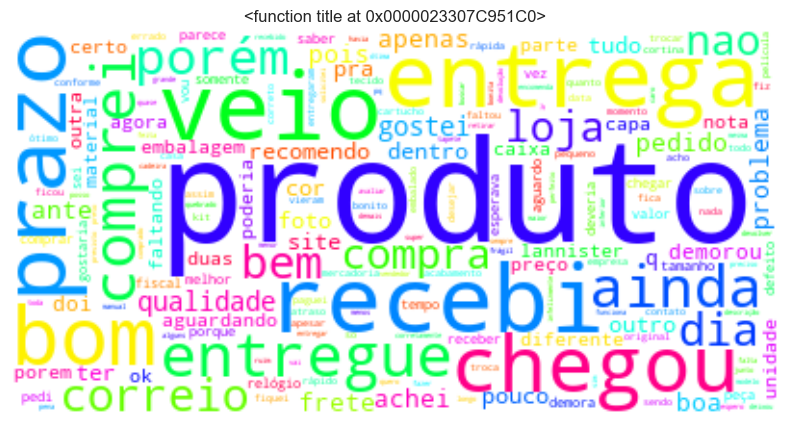

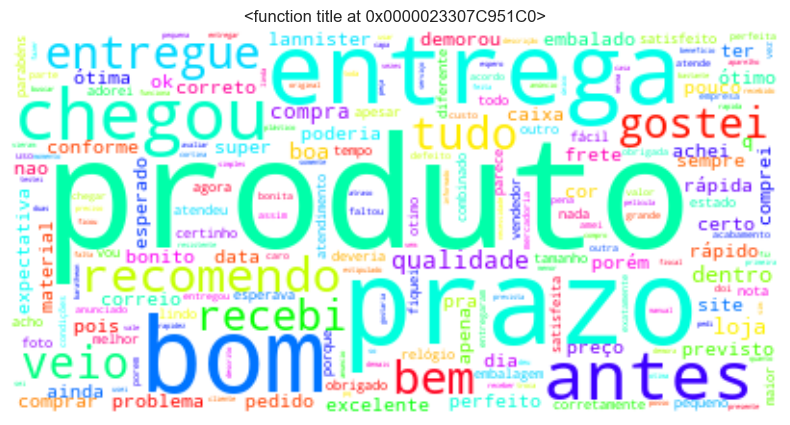

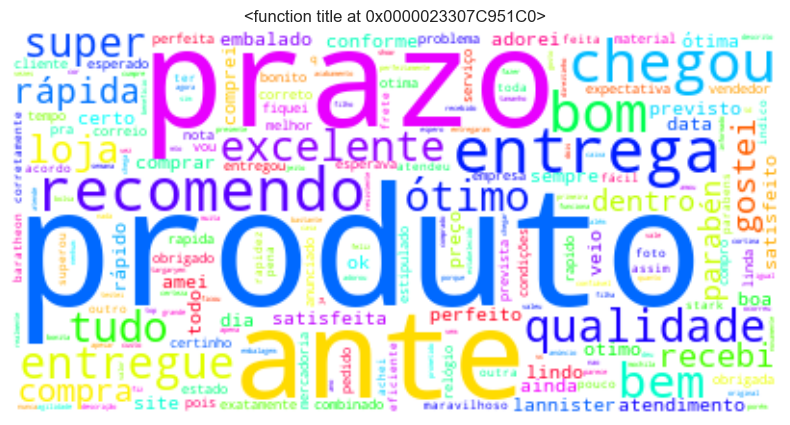

""


In [67]:
# wordcloud by target
data.groupby("review_score").apply(
    lambda group: display_wordcloud(" ".join(group.review_comment_message).lower()))#, title=group.review_score.unique()))